# Python final practice - EDA


## **1.** Question or problem definition.

Given the following Dataset:

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

Create a Jupyter Notebook with the following items

- 8 points -> An Exploratory Data Analysis focusing especially on answering the following business question What factors are related to passengers having a higher/lower probability of survival?

- 2 points -> Train a Logistic Regression algorithm to be able to properly classify passengers between those who survived and those who did not ('Survived' variable).

The Logistic Regression part of the algorithm is not taken into account for pass/fail, but if you want to get more than an 8 it is necessary to do it.

It is important to comment in detail in Markdown cells what is being done in each step, and why, as well as your opinions and reasoning about the results obtained.

## **2.** Titanic DataSet

Imagine you are in the year 1912, aboard the largest and most luxurious ship ever built, sailing to America. The RMS Titanic, an engineering marvel of the era, makes its maiden voyage from the port of Southampton to New York, carrying more than 2,200 passengers and crew. 

But on the dark night of April 14, the ship strikes an iceberg and begins to sink. Within hours, more than 1,500 people lose their lives in one of the worst maritime disasters in history.

More than a century later, the sinking of the Titanic continues to inspire, fascinate and move the world. 

Could the disaster have been avoided? **What factors influenced who survived and who did not?** These are some of the questions that scientists and researchers are trying to answer.

The dataset we will be working with contains detailed information about the passengers who were part of the Titanic's crew, their age, gender, socioeconomic class and whether or not they survived the sinking of the ocean liner. By analyzing this data, we will try to gain a unique insight into what happened that fateful night and learn more about one of the most tragic and poignant events in maritime history.

**My goal is to use advanced data analysis and machine learning techniques learned during my training to explore this dataset and uncover hidden patterns and relationships. I would like to be able to answer questions such as**: 
- What factors are related to the higher or lower probability of passenger survival? 
- Can we train a predictive model to correctly classify passengers according to their characteristics and determine their survival?

By the end of the analysis, I hope that we will have a deeper understanding of the sinking of the RMS Titanic and have developed valuable skills in data analysis and predictive modeling. 

Join me on this exciting journey through time, history and `my development as a data scientist ;)`

### libraries and imports

In this workbook, we will work with our [DataSet](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv) using some of the most popular and powerful libraries for data analysis. These libraries are NumPy, Pandas, Scikit-learn and Matplotlib. Each of them provides us with unique tools and functionalities to manipulate, analyze and visualize our data.

- **[NumPy](https://numpy.org/)** allows us to work with multidimensional arrays efficiently and perform mathematical and logical operations on them. 
- **[Pandas](https://pandas.pydata.org/)** provides us with high-performance, easy-to-use data structures and data analysis tools. 
- **[Scikit-learn](https://scikit-learn.org/stable/index.html)** is a machine learning library that allows us to apply a wide range of algorithms and tools for predictive analytics and data mining.
- **[Matplotlib](https://www.bing.com/search?q=matplotlib&cvid=444e5abb39e94700bcccab5e60a3032e&aqs=edge.0.46j69i57j0l7.5070j0j4&FORM=ANAB01&PC=U531)** allows us to create static, animated and interactive visualizations to explore and present our data.
- **[SeaBorn](https://seaborn.pydata.org/)** data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In the following sections, we will use these libraries to load, clean, analyze and visualize our dataset and achieve our goals.

In [1]:
import numpy as np                                          # Algebra.
import pandas as pd                                         # Data processing.

In [2]:
import matplotlib.pyplot as plt                             # Plot the data and display graphics inside jupyter.
%matplotlib inline                            
from matplotlib.colors import ListedColormap                # Create color map.
import seaborn as sns                                       # Seaborn, style plug-in for matplotlib. 

In [3]:
from sklearn.impute import KNNImputer                       # Allows us to use k nearest neighbors.
from sklearn.model_selection import train_test_split        # It allows us to separate our set in two to work with the predictive model.
from sklearn.linear_model import LogisticRegression         # Allows us to use logistic regression on the model.
from sklearn.preprocessing import StandardScaler            # Standardize the characteristics by removing the mean and scaling to the unit variance.

### **3.** Types of data available and exploratory analysis

The time has come, let's get started!

I have just conducted a brief review of the columns comprising the dataset.

First and foremost, we need to access the data, which we will store in a variable for further processing.

Next, we will load the data into the variable named `rms_titanic`. Personally, I prefer using the passenger number as the index.

In [4]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'        # We store the csv in variable.
rms_titanic = pd.read_csv(url, index_col='PassengerId')                                      # we access the dataset by storing it in the var rms_titanic and using the PassengerID column as index. 

In [5]:
rms_titanic.info()                                                                           # General dataset information.

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The DataFrame has 891 rows and 11 columns in total.

Most of the columns contain 891 values, indicating that there is no missing data in them.

`However`, the `Age`, `Cabin` and Embarked columns contain null data (we will see later). 

The series contain different types of data, including:
- Integer (int64)
- Floats (float64)
- Objects (object)

The memory size occupied by the DataFrame is approximately 83.5 KB.

In [6]:
rms_titanic                                  # Dataset overview. 

# I prefer to use this display shape instead of .head or .tail because calling the set in a single view displays the same data along with a .shape

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Data legend
The data set is composed of the following data: 

- **survival**: 0 = no, 1 = yes
- **pclass**: 1 = 1st, 2 = 2nd, 3 = 3rd
- **name**: self explanatory
- **sex**: self explanatory
- **age**: self explanatory
- **sibsp**: n of sibilings / spouses on board
- **parch**: n of parents / children on board
- **ticket**: self explanatory
- **fare**: passenger fare
- **cabin**: self explanatory
- **embarked | port of embrarkation**: C = Chernourg, Q = Queenstown, S = Southhampton

### **4.** Prepare and cleanse the data.

In this section, our focus will be on thorough preparation and cleaning of the dataset to ensure its suitability for subsequent analysis.

- We will perform a thorough analysis to identify potential duplicate instances in our dataset and determine the appropriate approach to address these duplicates. This could involve removing duplicates or retaining a single instance.

- We will apply data transformation techniques to ensure that data is presented in the optimal format for analysis. These techniques may include normalizing or standardizing the data, coding categorical variables, or even creating new variables from existing ones.

- We will address the issue of missing data in our set. This process could encompass the elimination of instances with missing values, the imputation of values using the mode or median, and the consideration of more advanced approaches such as the use of the K-nearest neighbors (KNN) algorithm, among others, for the estimation of missing values.

In summary, this section will be focused on ensuring that our data set is clean and ready for further analysis.

#### Checking for duplicate data

To make sure there is no duplicate data in our dataset, we will copy the original DataSet to a new variable that will be our working version.

We will then proceed to perform the duplicate check on this new variable to verify that there are no duplicate records.

Although we already have prior knowledge that there should be no duplicate data in this DataSet, it is good practice to perform the check systematically to ensure the integrity of our analysis.

In [7]:
titanic = rms_titanic.copy()
titanic = pd.concat([rms_titanic, rms_titanic])     # we will use the concat() method of pandas to place the dataset behind itself.

print('rms_titanic: ', rms_titanic.shape)           # we use shape to show the size of the Datasets.
print('titanic: ', titanic.shape)                   

rms_titanic:  (891, 11)
titanic:  (1782, 11)


The original data set consists of 891 rows and 11 columns.

After the concatenation operation, a new DataSet was generated with dimensions of 1782 rows x 11 columns, just double. 

Well, let's eliminate the duplicates.


In [8]:
titanic = titanic.drop_duplicates()                 # using the drop_duplicates() method we remove possible duplicate data.
print('titanic: ', titanic.shape)                   # we check the size of the dataset.

titanic:  (891, 11)


After performing the duplicate removal operation, we check the size of the DataSet again and everything looks correct: (891 rows x 11 columns). 

#### Null data management

Once we have verified the absence of duplicate data in the data set, it is time to face the challenge of null values. This stage of the process is vitally important, as it involves making decisions about how to address the absence of data within our data set. These decisions can have a significant impact on all subsequent analysis.

First, we will proceed to identify in which columns the null values are found and how many of them exist.

To detect missing values in the data set, we can use the `isnull()` method, which will allow us to identify all null values in each column. Next, we will use the `sum()` method to calculate the total missing values in each column.

This action will give us an overview of the columns that are affected by missing values in the data set.

In [9]:
titanic.isnull().sum()                     

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

After reviewing the contents of the dataset and assessing the number of missing values, I have made the decision to remove the `Cabin` column. 

Although this column contains potentially valuable information, especially if we had access to the ship's plans, more than 75% of its values are null. Therefore, I believe that we can dispense with this column without it having a significant impact on our analysis.

In [10]:
del titanic['Cabin']                                # deletes the cabin column. 
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

We will now proceed to address a rather simple adjustment: we will deal with the missing values in the `Embarked` column, which has only 2 null values.

Since the number of missing values is minimal, we can apply the mode (i.e., the most frequent value) to complete this data. Statistically, it is very likely that these passengers embarked at the same port as most of the other passengers.

In [11]:
most_comun_port = titanic['Embarked'].mode()[0]                        # we use the mode() method to find the mode of the embarked column .
print('Most comun port: ', most_comun_port)                            # print it on the screen.

print('\n','-'*80, '\n')                                               # separator.

titanic['Embarked'] = titanic['Embarked'].fillna(most_comun_port)      # with the fillna() method we search and fill the null data of the embarked column with the new variable.
 
titanic.isnull().sum()

Most comun port:  S

 -------------------------------------------------------------------------------- 



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

The next step would be to deal with the missing values in the `Age` column. However, before doing so, we will normalize and transform the data in our dataset. For now, we will not modify the missing values. We will reveal later why we have made this decision.

#### Normalization or standardization of data

In this part of the process we will focus on giving our dataset a facelift so that it is ready for analysis.

First we will work on changing the format of the data. It is very important that our variables have a common format so that we can work with them.

We will make our dataset breathe harmony! 

In [12]:
titanic.head()                                                      # Checking.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


As we can see we have two series that we must standardize to be able to operate with them, these are `Sex` and `Embarked`.

In this next step, we are going to transform the series `Sex` into a binary categorical variable.

In [13]:
change_sex = {'female': 0, 'male': 1}                               # We create a dictionary with the data to be transformed.
titanic['Sex'] = titanic['Sex'].map(change_sex)                     # we map the series sex transform the binary data.

titanic.head()                                                      # Checking.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


Great, let's proceed!

From my perspective, there might not be a direct relationship between the port of embarkation and the survival rate, however, I would like to verify this. Therefore, we will transform the `Embarked` column to facilitate further processing and study any potential interactions it might have.

In [14]:
embarked_port = {'C': 1, 'Q': 2, 'S': 3}                            
titanic['Embarked'] = titanic['Embarked'].map(embarked_port)       

titanic.head()                                                      

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3


Remember that we previously left the null values in the `Age` series untreated, well it's time to tackle it like a pro        :O

Once we have successfully transformed the Sex and Embarked series into categorical data, we are ready to deal with these null values. 

Among many other possible techniques, the technique we are going to use to impute these null values is the `k-nearest neighbor (k-NN)` method. This method assigns to each missing value the most approximate and probable value based on the comparison of the characteristics of its nearest neighbors (i.e., k-nearest neighbor values).

Although I found this technique somewhat complex at first, it is a powerful tool that I wanted to integrate to deal with the missing values in our dataset.

In [15]:
x = titanic[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']]   # Select the columns to be imputed (all but name and ticket).
imputer = KNNImputer(n_neighbors=5)                                                       # we create an object for the call to imputation with 5 nearest objects.
x_imputed = imputer.fit_transform(x)                                                      # invoke the fit_transform() method to work on the data and store the result in another variable .
titanic.loc[titanic['Age'].isnull(), 'Age'] = x_imputed[:, -1][titanic['Age'].isnull()]   # we use .loc to select the rows with nulls from the Age column and replace the nulls with the imputed data.

titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
titanic.head()                                                      # Checking.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3


With this we have finished the data preparation and cleaning section. 

We are left with two columns that we could continue working with: `Name` and `Ticket`... but we are going to continue without them. 

In the case of the `Name` column, we could try to extract additional information, such as the noble title, medical, etc... following the suggestion of my prof  (**thanks for all your advice, respects ;)**) However, I personally do not think that this information is relevant and meaningful for the result of our analysis. 

And as for the `Ticket` column, it seems to contain the serial number of the tickets purchased by each passenger, but it does not seem to have a clear order or correlation with each other or with other variables in our dataset. Therefore, I consider that we can leave these columns unchanged.

If necessary, we will consider removing them at a later date.

### **5-7** Descriptive statistics, data visualization and analysis

Our goal is to deepen our understanding of the data and discover patterns and relationships between the different series.

To achieve this, we will use tools such as graphs, tables and statistical measures to summarize and present the information contained in our data set.

Through this analysis, we hope to gain valuable information that will allow us to formulate hypotheses and guide our future analyses. 

We start the analysis with the `describe()` method, which will give us a quick overview of the distribution of statistical values in each column.

In [17]:
titanic.describe()                       # Summary statistics .

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,30.061452,0.523008,0.381594,32.204208,2.536476
std,0.486592,0.836071,0.477990,13.644962,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


This summary includes the following statistical measures:

- **count**: the number of non-zero values in the column.
- **mean**: the arithmetic mean of the values in the column.
- **standard deviation**: the standard deviation of the values in the column.
- **min**: the minimum value in the column.
- **25%**: the 25 percentile of the column values.
- **50%**: the 50 percentile (median) of the values in the column.
- **75%**: the 75 percentile of the values in the column.
- **max**: the maximum value of the column.

Broadly speaking, we can begin to extract some relevant data:
- The average survival rate was 38%, with a predominance of female survivors.
- A considerable number of passengers purchased third class tickets.
- The composition of the crew was mostly composed of men.
- The average age of the passengers was 30 years.
- Most of the passengers were traveling without family members.
- The average ticket price stood at £32.20.
- Southampton was the most frequent port of embarkation.

Having reviewed the general statistics, we have obtained an overview of the situation of the RMS Titanic prior to her departure from English shores.

We are now ready to begin our analysis and draw the first meaningful conclusions. Using graphs, tables and statistical measures, we will seek to visually understand the data as a whole.

###### (let's create our color range for plotting.)

In [18]:
high_contrast = 'Set1'
class_color = ['skyblue', 'lightgreen', 'salmon']
embarked_color = ['skyblue', 'lightgreen', 'salmon']
survival_color = ['salmon', 'skyblue']
survival_dictionary = {0: 'salmon', 1: 'skyblue'}

Let's start our analysis of the graphs with the number of passengers per class of ticket purchased.

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


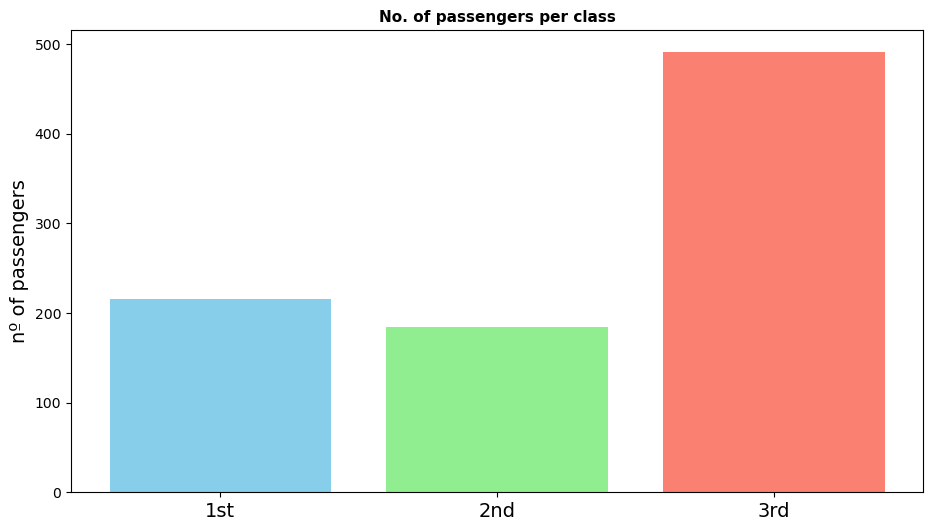

In [19]:
# Statements
pclass_count = titanic['Pclass'].value_counts().sort_index()                                                 # We create a variable and store in it a series with the categories and the sum of all of them.
print(pclass_count)

# Graph
plt.figure(figsize=(11, 6))                                                                                  # we create a figure and give it dimension.

plt.bar(pclass_count.index, pclass_count, color = class_color)                                               # we create a bar chart indicating the axes and color it.
plt.xlabel('')                                                                                               # we empty the x-axis
plt.xticks([1,2,3], ['1st', '2nd', '3rd'], fontsize=14)                                                      # we rename the x-axis ticks by selecting and replacing them.
plt.ylabel('nº of passengers',fontsize=14)                                                                   # we rename the y-axis and give it size.
plt.title('No. of passengers per class', fontdict={'fontsize': 11, 'fontweight': 'bold'})                    # retitle and align in the center, give size and weight (This reminds me a lot of CSS :D).

plt.show()                                                                                                   # we plot.

It is interesting to note that in the previous chart, we could observe that the mean ticket class was 2.3, which might have suggested that most passengers were in second class and, to a greater extent, third class. However, upon further analysis of this new graph, we can confirm the bias indicating that the vast majority of passengers were in third class, significantly exceeding half of all passengers.

This finding provides a more accurate perspective of the class distribution and gives us a better understanding of the socioeconomic composition of passengers on board.

We will now continue the analysis with data from the Fare series.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


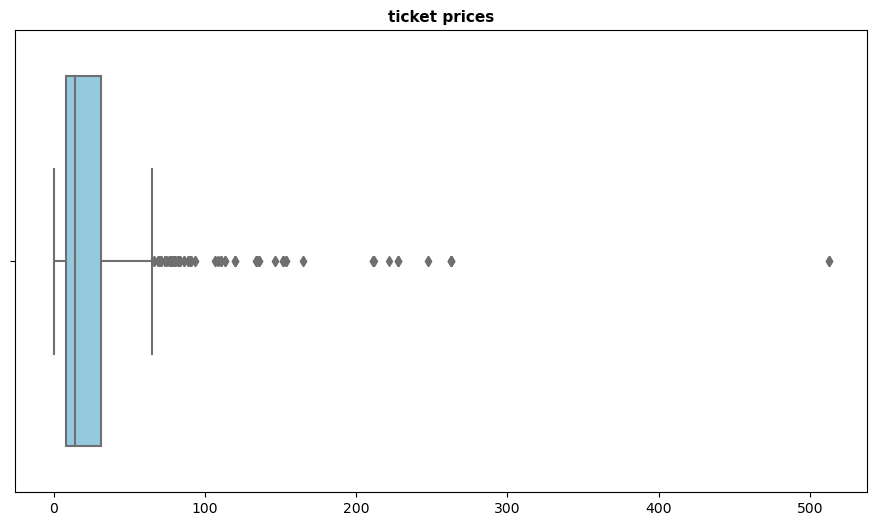

In [20]:
print(titanic['Fare'].describe())

plt.figure(figsize=(11, 6))                                                                                # We create a figure and give it dimension.

sns.boxplot(x=titanic['Fare'], color='skyblue')                                                            # we use seaborn to create a boxplot and use the Fare series on the x-axis, we color the box.   
plt.xlabel('')                                                                                             # we empty the x-axis label.
plt.title('ticket prices', fontdict={'fontsize': 11, 'fontweight': 'bold'})                                # we retitle and align in the center, give size and weight.                                              

plt.show()                                                                                                 # we plot.

It should be noted that the median of the fare series shows a very high standard deviation (49.69), indicating a large difference between the fares paid by all passengers.

In fact, if we review the statistics the maximum fare paid was £512.33, while the median was £32.20. As a curious fact, there were passengers who were given free boarding.

Next, we will analyze the age distribution within the passage.

count    891.000000
mean      30.061452
std       13.644962
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


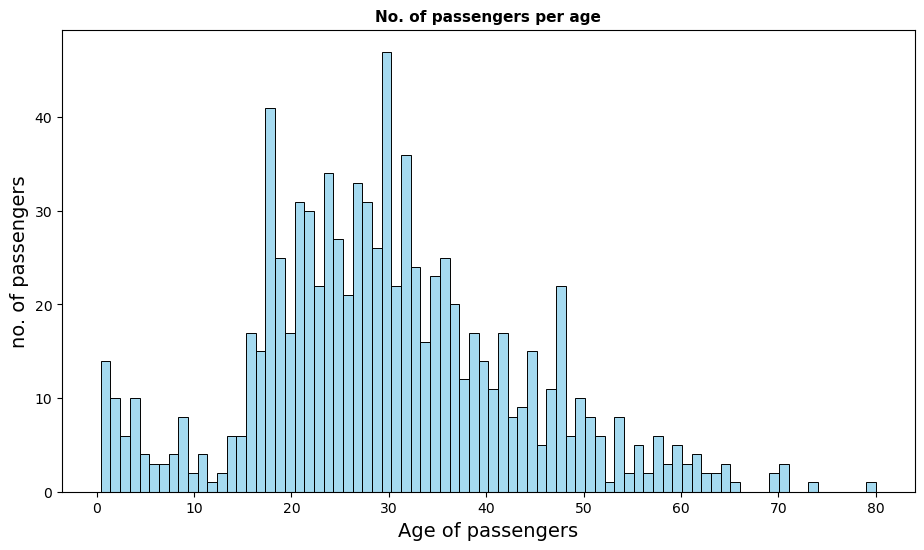

In [21]:
print(titanic['Age'].describe())

plt.figure(figsize=(11, 6))                                                                              # We create a figure and give it dimension.

sns.histplot(data=titanic, x='Age', bins=80, color='skyblue')                                            # we create a histiogram with the age series data and spread it over 80 cells (which is the maximum age) and color it.
plt.xlabel('Age of passengers', fontsize=14)                                                             # we customize the x-axis label and size it.
plt.ylabel('no. of passengers', fontsize=14)                                                             # we customize the y-axis label and size it.
plt.title('No. of passengers per age', fontdict={'fontsize': 11, 'fontweight': 'bold'})                  # we retitle and align in the center, give size and weight.   

plt.show()                                                                                               # we plot.

We observe that there is a notable number of newborns in the passage, and this figure remains constant from 0 to 4 years of age. Subsequently, the number of passengers gradually decreases. Then, we can identify a steeply upward curve between the ages of 16 and 31, reaching its peak, and then declining towards the age of 40. From this point on, as the ages increase, a decrease in the number of passengers is observed, with the exception of the 47 years age group.

We continued to explore the SibSp and Parch series data, which represent the number of family members who accompanied each passenger on the trip.

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64 
 -------------------- 
 Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64 
 -------------------- 



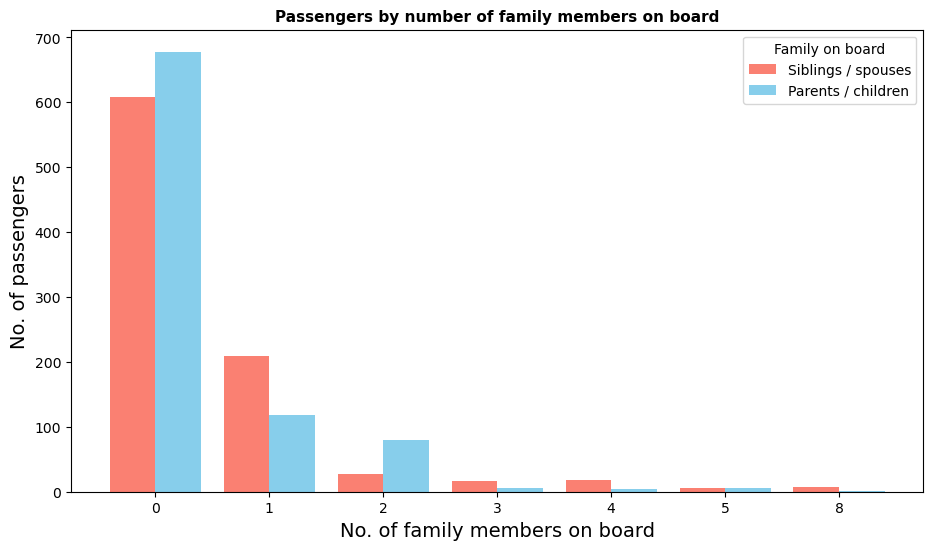

In [22]:
# Statements
sibsp_count = titanic['SibSp'].value_counts().sort_index()                                          # Creates a series within the variable and calculates the number of passengers in each group SibSp (number of siblings/spouses on board).
parch_count = titanic['Parch'].value_counts().sort_index()                                          # we do the same with Parch (parents/children abroad).
width = 0.40                                                                                        # we select a width for the histiogram bar, this will allow to place the sibsp bar next to the parch bar.
index = np.arange(len(sibsp_count))                                                                 # we create a list with the range of sibsp, which we know has the most values.

print(sibsp_count,'\n', '-'*20, '\n', parch_count, '\n', '-'*20, '\n')

# Graph
fig, x = plt.subplots(figsize=(11, 6))                                                              # We create a figure and give it dimension.

bar_sibsp = x.bar(index, sibsp_count, width, label='Siblings / spouses', color='Salmon')            # we create the bars for sibsp. we tell it where they have to go, their content, the width of the bar, how we want it to be identified and we color it.
bar_parch = x.bar(index + width, parch_count, width, label='Parents / children', color='Skyblue')   # we do the same for the parch bars, but this time we tell it that the position is the same but to add the width of a bar, that way it doesn't stack with the previous one. 
x.set_xlabel('No. of family members on board', fontsize=14)                                         # we customize the x-axis label and size it.                             
x.set_ylabel('No. of passengers', fontsize=14)                                                      # we customize the y-axis label and size it.
x.set_title('Passengers by number of family members on board', fontdict={'fontsize': 11, 'fontweight': 'bold'})    # we retitle and align in the center, give size and weight.  
x.set_xticks(index + width / 2)                                                                     # the positions on the x-axis where the bar labels will be placed. They are placed in the middle between the bars for SibSp and Parch.
x.set_xticklabels(sibsp_count.index)                                                                # we define the labels for the bars on the x-axis as the unique values of SibSp.
x.legend(title='Family on board')                                                                   # we create a title for the legend and the tags we have created.

plt.show()                                                                                          # we plot.

Analyzing the graph, we can see that the majority of passengers, just over 600, were traveling without siblings and/or spouses. In addition, almost 700 passengers were traveling without parents or children on board. This indicates that a large number of passengers were traveling individually or without immediate family members. Furthermore, we can observe that the groups of families compared to the previous group are considerably reduced and decrease as the number of family members increases.

We will now proceed to explore the data relating to passenger gender.

Sex
1    577
0    314
Name: count, dtype: int64


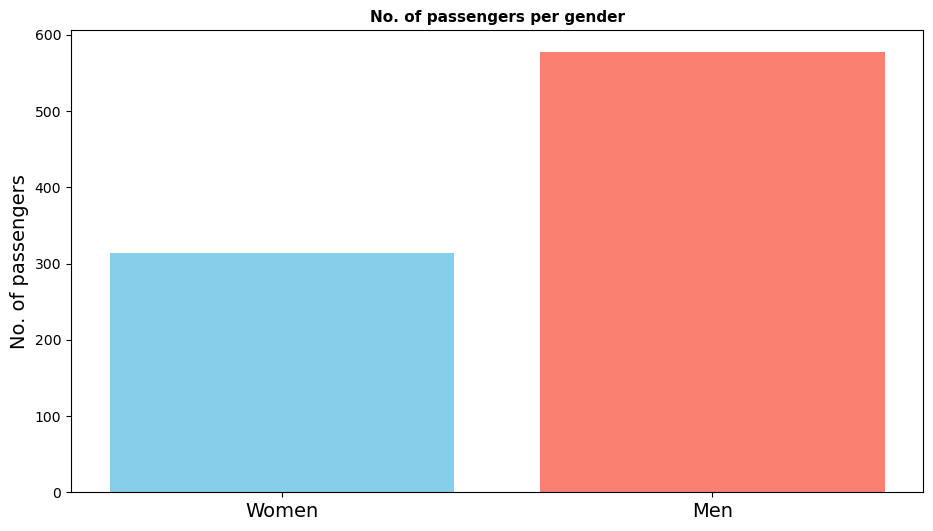

In [23]:
# Statements
gender = titanic['Sex'].value_counts()                                                   # we create a series to count the number of passengers of each genre.             
print(gender)

# Graph
fig, plot = plt.subplots(figsize=(11, 6))                                                # We create a figure and give it dimension.

plt.bar(gender.index, gender, color=survival_color)                                      # we create a bar chart with the index of the series we have generated and tell it to use the stored values, then we colorize.
plt.xlabel('')                                                                           # we empty the x-axis label.
plt.xticks([0, 1], ['Women', 'Men'], fontsize=14)                                        # we change the X-axis ticks, select the desired ones and then choose the custom ones.
plt.ylabel('No. of passengers', fontsize=14)                                             # we customize the y-axis label and size it.
plt.title('No. of passengers per gender', fontdict={'fontsize': 11, 'fontweight': 'bold'})    # we retitle it and align it in the center, give it size and weight.  

plt.show()                                                                               # we plot.

In this gender graph, we can see that the majority of passengers on the liner were male, representing approximately 64.8%.

Now, let us examine the data concerning the ports of embarkation

Embarked
1    168
2     77
3    646
Name: count, dtype: int64


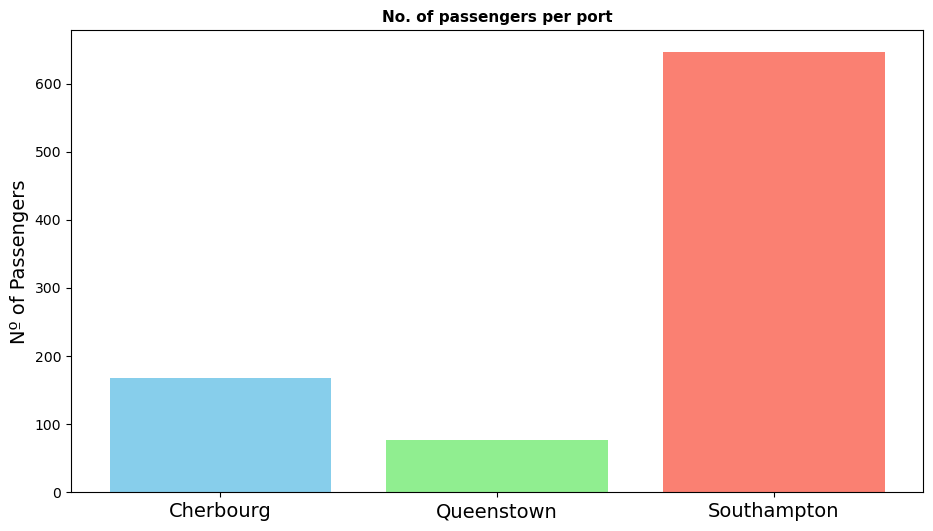

In [24]:
# Statements
embarked_count =  titanic['Embarked'].value_counts().sort_index()                                    # We create a series using the boarding ports as an index and adding each passenger. 
print(embarked_count)

# Graph
fig, plot = plt.subplots(figsize=(11, 6))                                                            # We create a figure and give it dimension.

plt.bar(embarked_count.index, embarked_count, color=embarked_color)                                  # we create a bar chart using as an index the one of the created series, load its values and color it.
plt.xlabel('')                                                                                       # we empty the x-axis label .
plt.xticks([1, 2, 3], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14)                       # we change the X-axis ticks, select the desired ones and then choose the custom ones.os.
plt.ylabel('Nº of Passengers', fontsize=14)                                                          # we customize the y-axis label and size it.
plt.title('No. of passengers per port', fontdict={'fontsize': 11, 'fontweight': 'bold'})             # we retitle it and align it in the center, give it size and weight .

plt.show()                                                                                           # we plot .                                                                                         

Excellent! In this chart we can see that the port of Southampton had the highest number of passengers embarked, which is logical given that the ship sailed from that port and subsequently called at the other ports before departing for the high seas.

Finally, we will explore the survival rate during the disaster.

Survived
0    549
1    342
Name: count, dtype: int64


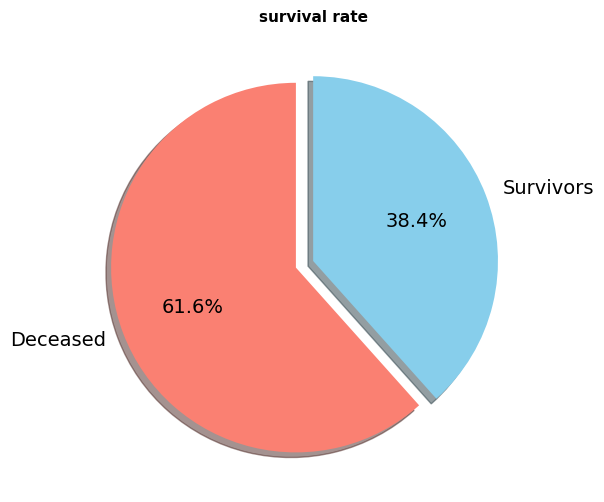

In [25]:
# Statements
survival_count = titanic['Survived'].value_counts()                                                         # We create a new series with the data from the suvived table.
print(survival_count)

# Graph
fig, plot = plt.subplots(figsize=(11, 6))                                                                   # We create a figure and give it dimension.

# We create a pie chart with labels for each part, percentage format with a single decimal, angle to start from, colors, font size, spacing between pie parts and shading. 
plt.pie(survival_count, labels=['Deceased', 'Survivors'], autopct='%1.1f%%', startangle=90, colors= survival_color , textprops={'fontsize': 14}, explode=[0.1, 0], shadow=True)  
plt.title('survival rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})                                 # we retitle it and align it in the center, give it size and weight .

plt.show()

The graph shows that only 38.4% of the passengers survived the shipwreck (342 of the almost 900 on board), which represents a mortality rate of 61.6%, an extremely high rate.

This concludes the data presentation section. Thanks to this visual representation, we have been able to better understand the previous data in the dataset and get a snapshot of the DataSera. In the next section, we will continue to deepen our analysis and explore the dataset in more detail.

#### Next, we continue our analysis by exploring the correlation between the data.

In this part of the analysis, we will work with bivariate and/or multivariate analyses, which will allow us to explore the relationships and interactions between different variables. This approach will provide valuable information on the underlying patterns and dependencies in the data, helping us to better understand the dynamics and factors that may have influenced the poor results. 

In the first part, we will use a heat map to explore the correlations between variables.

This visualization technique allows us to represent the correlations in a matrix format with color gradients, which facilitates visual identification and understanding of the relationships between variables. 

The heat map provides an intuitive and clear representation of the strength and direction of correlations, allowing us to work with the data more easily and gain valuable insights.

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.110313 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.361498  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.139182 -0.114631 -0.245489   
Age      -0.110313 -0.361498  0.139182  1.000000 -0.215897 -0.183820   
SibSp    -0.035322  0.083081 -0.114631 -0.215897  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.183820  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.092513  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.008357  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex      -0.182333  0.108262  
Age       0.092513 -0.008357  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000  


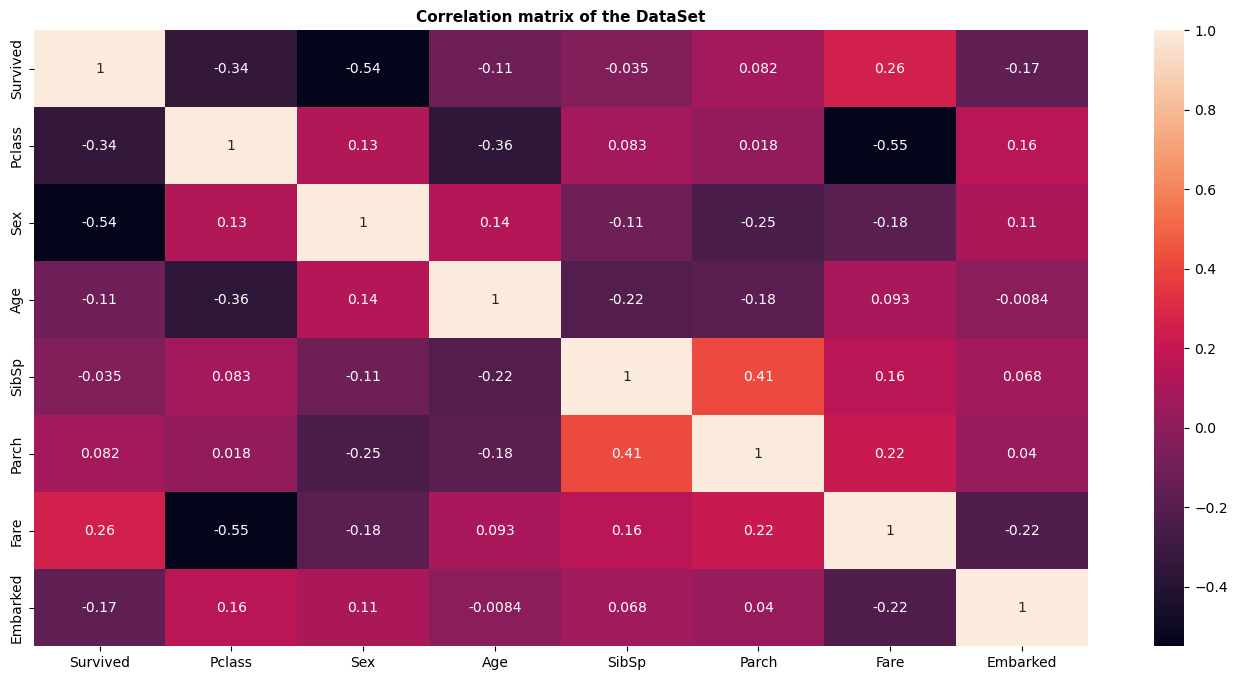

In [26]:
# Statements
corr = titanic.corr(numeric_only=True)                                       # We call the corr() method and tell it to use only the columns with numeric data.
print(corr)

# Graph
fig, ax = plt.subplots(figsize=(17, 8))                                      
sns.heatmap(corr, annot=True)                                                # we create a heat map with the above variable and tell it to use annotations.
plt.title('Correlation matrix of the DataSet', fontdict={'fontsize': 11, 'fontweight': 'bold'}) 

plt.show()

###### As we can see this heat map is much nicer than the raw data we have stored.

If we look closely at the resulting matrix, we can draw some interesting conclusions:
- 'Fare' shows a negative correlation with 'Pclass' (-0.549500), indicating (unsurprisingly) that first class passengers paid more for their tickets.
- 'SibSp' exhibits a positive correlation with 'Parch' (0.414838), and suggests that passengers who traveled with siblings or spouses also traveled as a family with parents or children.
- 'Age' exhibits a negative correlation with 'SibSp' (-0.215897) and 'Parch' (-0.183820). This indicates to me that younger passengers generally traveled with siblings or parents.
- 'Survived' reveals a negative correlation with 'Pclass' (-0.338481) and 'Sex' (-0.543351), and this is very interesting for the study. It might suggest that passengers from higher classes and females had higher odds of surviving.


The moment of truth has arrived, when we put on our Sherlock Holmes cap and pipe and start our real investigation because...  "There is nothing more deceptive than an obvious fact."  ;)

### Embarked

The port of shipment.

What data are likely to be extracted and evaluated?

Our main task is to identify and collect information that will allow us to disentangle possible relationships between the port of embarkation and the survival rates of passengers aboard the Titanic.

Although it may at first appear that the port of embarkation does not directly influence the probability of passenger survival, the potential for providing valuable information should not be underestimated.

Therefore, we will proceed with the following evaluation of the data.

It consists of:

- Relationship between the number of passengers and the port of embarkation.
- Relationship between the number of survivors and the port of embarkation.
- Relationship between the port of embarkation and the class of ticket purchased.
- Relationship between embarkation port and ticket class by number of survivors
- Relationship between port of embarkation and ticket price
- Relationship between port of embarkation and ticket price per number of survivors
- Relationship between port of embarkation and survival rate

Let's start with a basic query of the data corresponding to the 'Embarked' series. This initial query will provide us with a preliminary view of the distribution and characteristics of the ports and the number of passengers.

In [27]:
embarked_count

Embarked
1    168
2     77
3    646
Name: count, dtype: int64

We proceed to visualize through bar charts that will allow us to examine both the distribution of passengers who embarked at each port and the breakdown of fatalities and survivors for each port.

These representations will provide us with a clearer understanding of the patterns and differences between the ports of embarkation in terms of passenger numbers and their survival outcomes.

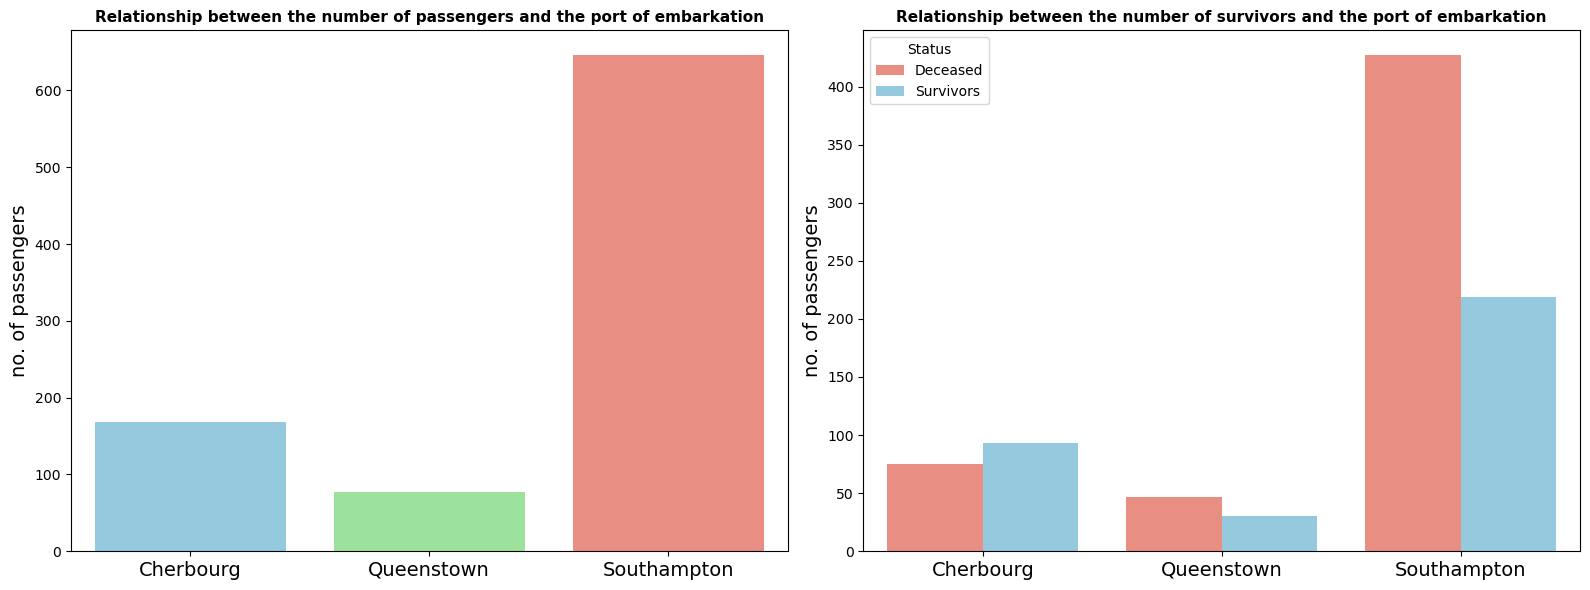

In [28]:
plt.figure(figsize=(16, 6))                                                                                                                                # We create a figure and give it a size.

# Graph 1
plt.subplot(1, 2, 1)                                                                                                                                       # we place the first graph in the first row of a two-row grid.                                                                                                                                               
sns.countplot(x='Embarked', data=titanic, palette=embarked_color)                                                                                          # We use the seaborn countplot function to autogenerate a plot with the 'Embarked' data as input, from the titanic dataset, and paint it with the variable we have stored.
plt.xlabel('')                                                                                                                                             # we empty the X-axis label.
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14)                                                                             # we replace the ticks on the x-axis with the name of the ports and size them .
plt.ylabel('no. of passengers', fontsize=14)                                                                                                               # we customize the y-axis label and shape it.
plt.title('Relationship between the number of passengers and the port of embarkation', fontdict={'fontsize': 11, 'fontweight': 'bold'})                    # We customize the title of the chart, center it and give it size and weight. 

# Graph 2
plt.subplot(1, 2, 2)                                                                                                                                       # we place the second graph in the first row of a two-row grid.
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette=survival_color)                                                                          # we use the seaborn countplot() function to autogenerate a plot with the 'Embarked' data as input by the 'Survived' data, from the titanic dataset, and paint it with the variable we have stored.
plt.xlabel('')                                                                                                                                             # we empty the X-axis label.
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14)                                                                             # we replace the ticks on the x-axis with the name of the ports and size them .
plt.ylabel('no. of passengers', fontsize=14)                                                                                                               # we customize the y-axis label and shape it.
plt.title('Relationship between the number of survivors and the port of embarkation', fontdict={'fontsize': 11, 'fontweight': 'bold'})                     # we customize the title of the chart, center it and give it size and weigh.
plt.legend(title='Status', labels=['Deceased', 'Survivors'])                                                                                               # we create a legend, generate a title for the legend and the labels for the values of the "Survivors" series.

plt.tight_layout()                                                                                                                                         # we use the .tight_layout() function of matplotlib to avoid overlaps.
plt.show()                                                                                                                                                 # we paint the grid.

Indeed, the bar charts provide an obvious visual representation of the disparities in passenger distribution between the different ports of embarkation. In particular, Southampton stands out as the port with the highest number of passengers, which is not surprising since, as mentioned above, it was the port from which she departed, presenting a significant difference with respect to the ports of Cherbourg and Queenstown, where she called.

As for the survival rate, it is interesting to note that all ports present a survival rate lower than the mortality rate. This trend is particularly noticeable in the case of Southampton, where the proportion of fatalities is notably higher. With the exception of the port of Cherbourg, which shows a reversal of this trend, with a survival rate higher than the fatality rate. This finding potentially indicates the existence of distinctive factors that could have influenced the survival probabilities.

Let us continue along this line of analysis. Next, we will proceed to examine the interaction between the class of ticket purchased by each passenger and the port of embarkation through the creation of stacked bar charts.

These graphs will provide a deeper insight into how the different ticket classes are distributed in relation to each boarding port. By stacking the bars, we will be able to visualize the relative contribution of each ticket class based on the corresponding port of embarkation. This approach will allow us to detect patterns or trends in the selection of ticket classes by embarkation location.

In addition, we will explore the tripartite relationship between embarkation port, ticket class and survival rate. 

Using additional stacked bar charts, we will be able to analyze how survival rates are distributed as a function of the combination of these three factors.

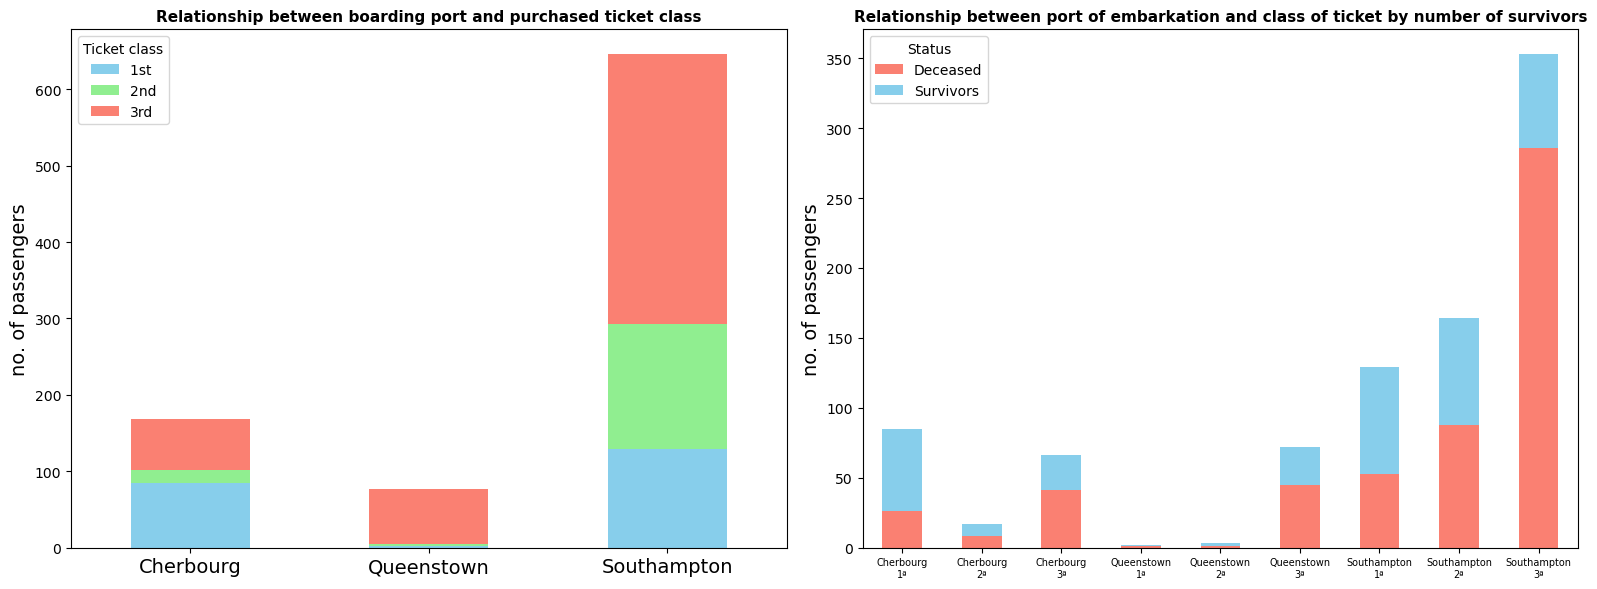

In [29]:
embarked_class = pd.crosstab(titanic['Embarked'], titanic['Pclass'])                                                                         # We create a data frame with the crosstab function crosstab table for Embarked and Pclass.
embarked_class_survived = pd.crosstab(index=[titanic['Embarked'], titanic['Pclass']],columns=titanic['Survived'])                            # same as above but with Embarked, Pclass and Survived.

fig, axs = plt.subplots(1, 2, figsize=(16, 6))                                                                                               # we create a grid of two subplots and we give it size.

axs[0] = plt.subplot(1, 2, 1)                                                                                                                # we create the first subplot in the left-hand position.
embarked_class.plot(kind='bar', stacked=True, ax=axs[0], color=embarked_color)                                                               # we create a stacked bar chart with the dataframe embarked_class.
plt.xlabel('')                                                                                                                               # we empty label x.
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14, rotation=0)                                                   # we fit the x-axis ticks by the name of the ports and rotate them ...I don't know why the numbers were lying down if there is a space ¯\_(ツ)_/¯                                          
plt.ylabel('no. of passengers', fontsize=14)                                                                                                 # we add a custom name and size for the y-axis label.
plt.title('Relationship between boarding port and purchased ticket class', fontdict={'fontsize': 11, 'fontweight': 'bold'})                  # we add a custom title, center it, apply bold and size.
plt.legend(title='Ticket class', labels=['1st ', '2nd', '3rd'])                                                                              # we create a personalized legend .

axs[1] = plt.subplot(1, 2, 2)                                                                                                                # We create the graph on the right.
embarked_class_survived.plot(kind='bar', stacked=True, ax=axs[1], color=survival_color)                                                      # we use the dataframe of embarked_pclass_survived to create the second, a stacked bar chart using the survival_color palette.
plt.xlabel('')                         
plt.ylabel('no. of passengers', fontsize=14)
plt.title('Relationship between port of embarkation and class of ticket by number of survivors', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.legend(title='Status', labels=['Deceased', 'Survivors'])
x_labels = ['Cherbourg', 'Queenstown', 'Southampton']                                                                                        # we create a list with the name of the ports. 
x_labels_with_class = [f'{port}\n{pclass}ª' for port in x_labels for pclass in ['1', '2', '3']]                                              # the first loop replaces the port number with the name we defined in x_tags and the second loop iterates the class. The result of each iteration we format it into a string and append ª to it. May the gods bless the internet!🥲
axs[1].set_xticklabels(x_labels_with_class, rotation=0, fontsize=7)                                                                          # we overwrite the x-axis ticks with the set_xticklabels function and rotate and size them.

plt.tight_layout()                                                                                                                           # we avoid overlapping..
plt.show()                                                                                                                                   # we paint them on the screen             

The first graph shows the distribution of the number of passengers of the different classes embarking at each of the ports. 
On examination, it can be seen that, as we already knew, Southampton recorded the highest volume of embarkations. However, the really interesting finding centers on looking at the distribution by class at each port. The overall picture highlights a clear predominance of third class bills. In Southampton, these third class tickets constitute approximately 50% of the total passage, while 30% is second class and 20% first class. In Queenstown, approximately 90% are third class. However, the discordant note is Cherbourg, where just over 50% of the tickets issued are first class.

The second graph shows the survival rate by class and port of embarkation. We note that the survival rate in second and third class does not exceed the 50% threshold in any of the ports. In contrast, first class passengers exceed this average, with the exception of those in Queenstown.

Discernible patterns are beginning to emerge in the data! The graph suggests a marked trend towards higher mortality rates, and this trend could be related to socio-economic factors. 

We will continue our investigation to test the hypothesis by analyzing the price paid per passage.

To do so, we will present a box plot that will allow us to visualize the distribution of fares paid per passage at each of the ports. and, in addition, we will explore how the survival rate correlates with the price of tickets.

This approach will allow us to examine the possible relationships between the price paid by passengers, their port of embarkation and survival probabilities. Box plots will provide us with information on dispersion, central trends and fare outliers, while the visual representation of the survival rate as a function of ticket price will help us to assess possible associations.

Through this analytical perspective, we will be better able to determine whether there is any discernible relationship between fares paid, port of boarding and survival rates. 

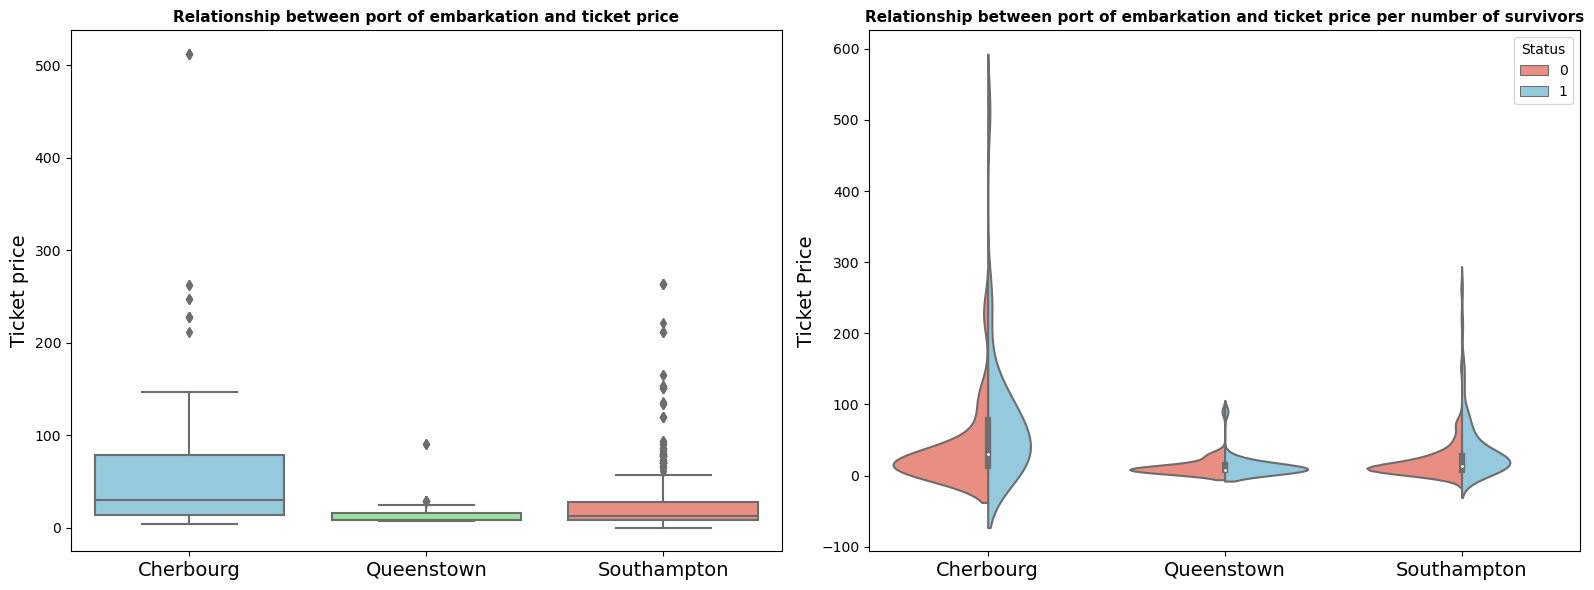

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))                                                                                          # we create a grid of two subplots and we give it size.

axs[0] = plt.subplot(1, 2, 1)                                                                                                           # we create the first subplot in the left-hand position.
sns.boxplot(y='Fare', x='Embarked', data=titanic, palette=class_color)                                                                  # we create a box plot with the Fare and Embarked series .
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14)                                                          # we change the x-axis marks to the name of the ports .                                              
plt.ylabel('Ticket price', fontsize=14)
plt.xlabel('')
plt.title('Relationship between port of embarkation and ticket price', fontdict={'fontsize': 11, 'fontweight': 'bold'})

axs[1] = plt.subplot(1, 2, 2)                                                                                                           # We create the graph on the right.
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=titanic, split=True, palette=survival_color)                                # we create a violin graph between Embarked and Fare by Survived, we use slplit to split the violins and give it color.
plt.xlabel('')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], fontsize=14)  
plt.ylabel('Ticket Price', fontsize=14)
plt.title('Relationship between port of embarkation and ticket price per number of survivors', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.legend(title='Status')

plt.tight_layout()
plt.show()

The first graph is very enlightening. We can observe the following: at the port of Cherbourg, where more than 50% of passengers carry first class tickets, fares are substantially higher than average. This difference is noticeable when comparing both the median and the percentile with the mean. In contrast, in Queenstown, where almost 90% of passengers traveled in third class, fares are clearly skewed toward the lower median. Also noteworthy is the presence of outliers or anomalous values at all ports, indicative of exceptionally high payments that distort the median fares.

The second graph, which uses a split violin plot, shows how the survival rate is segmented by ticket fare at each port. This diagram visualizes the distribution of survival rates for different fare ranges at the three ports. It highlights that in both Cherbourg and Southampton, survival rates are concentrated in the cheapest fares, suggesting a higher prevalence of fatalities in this category. However, Queenstown presents itself as an exception, showing a more equal parity in survival rates across fare levels.

This analysis provides further insight into how ticket fares, along with port of embarkation, may influence survival rates. The emerging patterns support the hypothesis that socioeconomic considerations may have played an important role in the likelihood of passenger survival.

I would like to conclude this section with the last pie chart, which provides a concise view of survival rates by port of embarkation. This simplified chart allows us to directly and comparatively evaluate how survival rates are distributed in each of the ports. We clearly observe how survival rates vary between Cherbourg, Southampton and Queenstown, which may provide additional clues as to the dynamics that influenced survival outcomes at the different embarkation sites.

This graph complements the ongoing analysis by highlighting the major discrepancies in survival rates between embarkation ports.

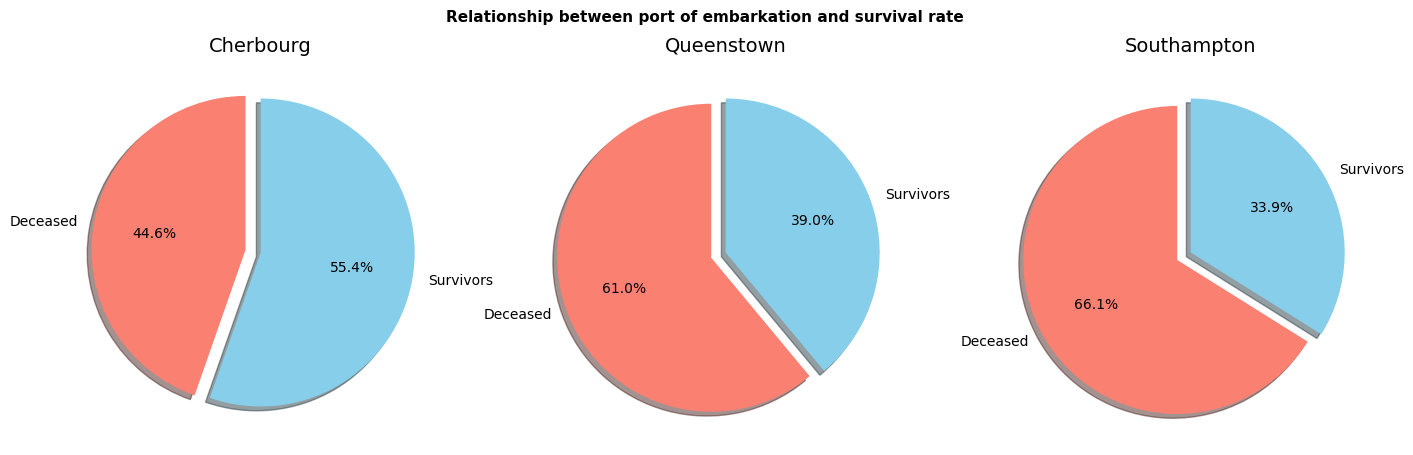

In [31]:
embarked_surv = pd.crosstab(titanic['Embarked'], titanic['Survived'])                                                 # We create a cross table between embarked and survived.
embarked_names = ['Cherbourg', 'Queenstown', 'Southampton']                                                           # we store the name of the ports.

fig, axes = plt.subplots(1, 3, figsize=(17, 5))                                                                       # we create a figure by creating 3 subplots and give it size.
for i, (embarked, counts) in enumerate(embarked_surv.iterrows()):                                                     # we run through the rows of the dataframe pulling out the ports and the number of passengers that survived, and the enumerate function provides an index.
    chart = axes[i]                                                                                                   # we create a variable that stores the corresponding graph in i .
    chart.pie(counts, labels=['Deceased', 'Survivors'], colors=survival_color, autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
     # we store i (shipped, count) in ax to use it in the pie chart. We rename the labels, color them, indicate that we only want one decimal place, align the starting axis, separate the slice and shade it.
    
    chart.set_title(embarked_names[i], fontsize=14)                                                                   # we apply the corresponding title of i.
fig.suptitle('Relationship between port of embarkation and survival rate', fontsize=11, fontweight='bold')

plt.show()

### Age

Age of the passage

We will now move on to the next stage of our study, in which we will analyze the 'Age' series in combination with several variables. 

This exploration will allow us to unravel valuable information derived from passenger age. Through this cross-analysis, we will seek to identify patterns, correlations and relationships between age and other fundamental elements present in the data set. 

By focusing on the variable 'Age', we will be in an advantageous position to understand how age played a role in determining survival rates and how it interacted with other factors. 

- Relationship between age and number of passengers
- Relationship between age and passenger survival
- Relationship between age and genre of passengers
- Relationship between age, genre and survival
- Relationship between age and family size
- Relationship between age, family size and survival
- Relationship between age, ticket class and survival rate

To begin our analysis, we will perform a refresh of the Age series data. This summary will allow us to start with an overview of the most relevant aspects related to passenger age. 

Thanks to this review, we will be prepared to go deeper into the relationships with the age series.

In [32]:
age = titanic['Age']
age.describe()

count    891.000000
mean      30.061452
std       13.644962
min        0.420000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Perfect, when examining the data, we can note that the average age of the passengers is around 30 years old. However, we can observe the varied range of ages, the youngest passenger was less than 6 months old, while the oldest passenger was 80 years old. This range in ages reveals the diversity present in the Titanic's passenger group, which ranged from newborns to elderly individuals. 

This variability in ages adds an additional layer of complexity to our analysis and thus prompts me to explore how this diversity may have interacted other factors to influence survival rates.

Let's get started.

We will begin our analysis by focusing our attention on delving more comprehensively into the age spectrum present in the passenger pool. I propose that we take a closer look at how survival rates were distributed across the various age ranges. This approach will allow us to unravel whether there were patterns among the ages of the passengers and their corresponding probabilities of surviving the shipwreck.

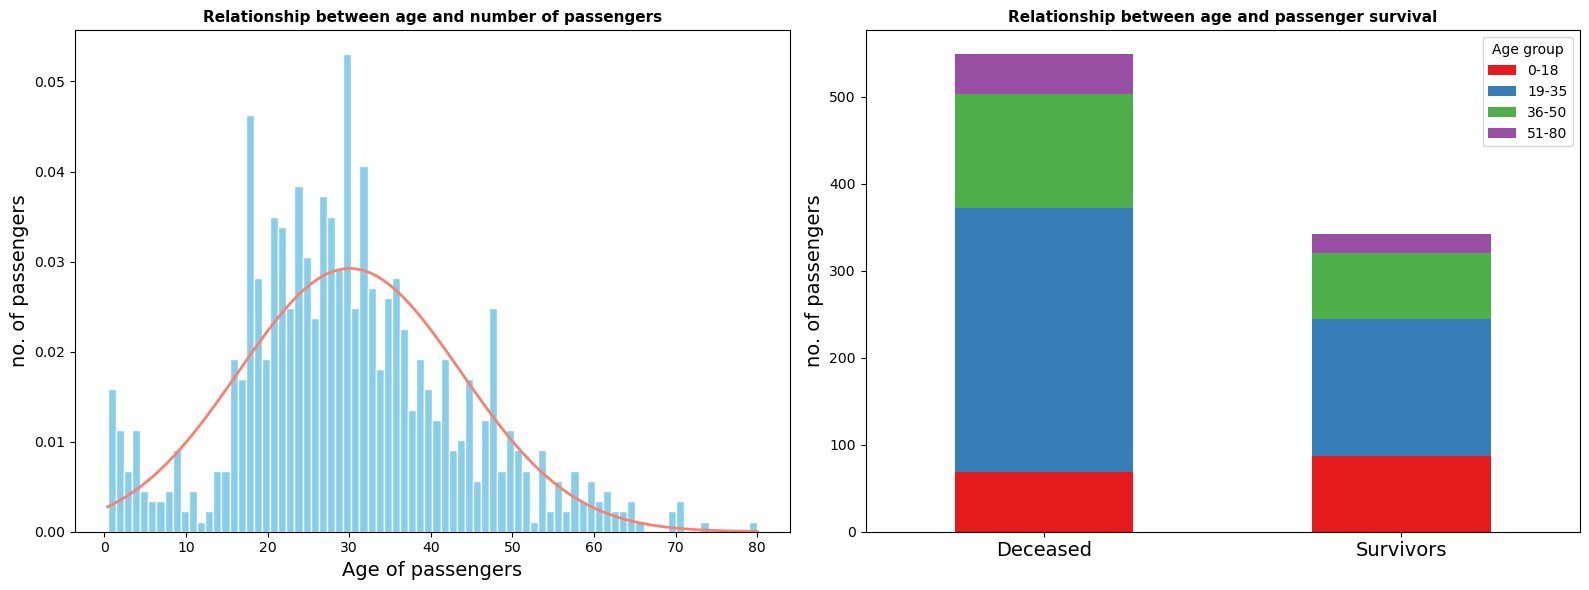

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6)) 

# Statements graph1
m = age.mean()                                                                                                                          # we calculate the mean of Age.
std = age.std()                                                                                                                         # we calculate the standard deviation.
x = np.linspace(age.min(), age.max(), 100)                                                                                              # we use Numpy's linspace() to divide the max and min age by 100.
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m) / std)**2)                                                                # we calculate the coordinates of the distribution curve with the mean and standard deviation over x.
  
# Statements graph2
survived = titanic.copy().reset_index()                                                                                                 # we create a copy and reset the dataset index.
age_bins = [0, 18, 35, 50, 80]                                                                                                          # we define the age sections.
age_labels = ['0-18','19-35', '36-50', '51-80']                                                                                         # we create the labels and the legend of the sections.
survived['age_group'] = pd.cut(survived['Age'], bins=age_bins, labels=age_labels)                                                       # we create a new series in the copy of the dataset based on Age, group by the groups defined in Age_bins and label with age_labels. 
pivot = survived.pivot_table(index='Survived', columns='age_group', values='PassengerId', aggfunc='count')                              # we create a pivot table where the index is formed by 'Survived', the columns of 'age_group' and the values of 'PassegerId' and performs the count.
sns.set_palette(high_contrast)                                                                                                          # we apply a palette of styles.

# Graph 1
axs[0].hist(titanic['Age'], bins=80, density=True, color='skyblue', edgecolor='white')                                                  # we create a histiogram with the 'Age' data, determine the number of segments and indicate that we want to use probability density.
axs[0].plot(x, y, color='Salmon', linewidth=2)
axs[0].set_xlabel('Age of passengers', fontsize=14)
axs[0].set_ylabel('no. of passengers', fontsize=14)
axs[0].set_title('Relationship between age and number of passengers', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph 2
axs[1] = pivot.plot(kind='bar', stacked=True, ax=axs[1])                                                                                # with the pivot table data we create a stacked bar chart.
axs[1].set_xlabel('')
axs[1].set_xticks([0, 1], ['Deceased', 'Survivors'], fontsize=14, rotation=0)
axs[1].set_ylabel('no. of passengers', fontsize=14)
axs[1].set_title('Relationship between age and passenger survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Age group')

plt.tight_layout()
plt.show()

In the first graph, a detailed observation of the crew distribution according to age ranges is made, using a histogram as a representation tool. The graph reveals several key points. 
- On the left, a relatively small but significant group of boys and girls, aged 0 to 10 years.
- In the center, the majority of the crew was between the ages of 20 and 40, indicating a predominant segment. 
- However, as age increases, a drastic decrease in the number of individuals is evident. 
This graph clearly reflects the age distribution within the crew, showing peaks and troughs as a function of the different groups.

The second graph provides a detailed visualization by means of a stacked table chart, illustrating the distribution of age groups and their respective survival rates. 
Close inspection reveals that, among the youngest groups, only minors exceed a survival rate of 50%. In contrast, for the other age categories, this figure is barely achieved. This visual representation reinforces the idea that, in general, crew survival is linked to a greater extent to younger ages, which could suggest preferential evacuation measures.

Let's continue to advance our understanding of crew demographics. 

Now, we will focus on conducting a specific analysis to determine age ranges by crew gender. This exploration will provide us with a more complete picture of how ages are distributed by gender.

In addition, we will seek to analyze survival rates in relation to gender. This step will provide us with detailed insight into how survival rates differ between genders and gain essential information on how this may have influenced survival probabilities.

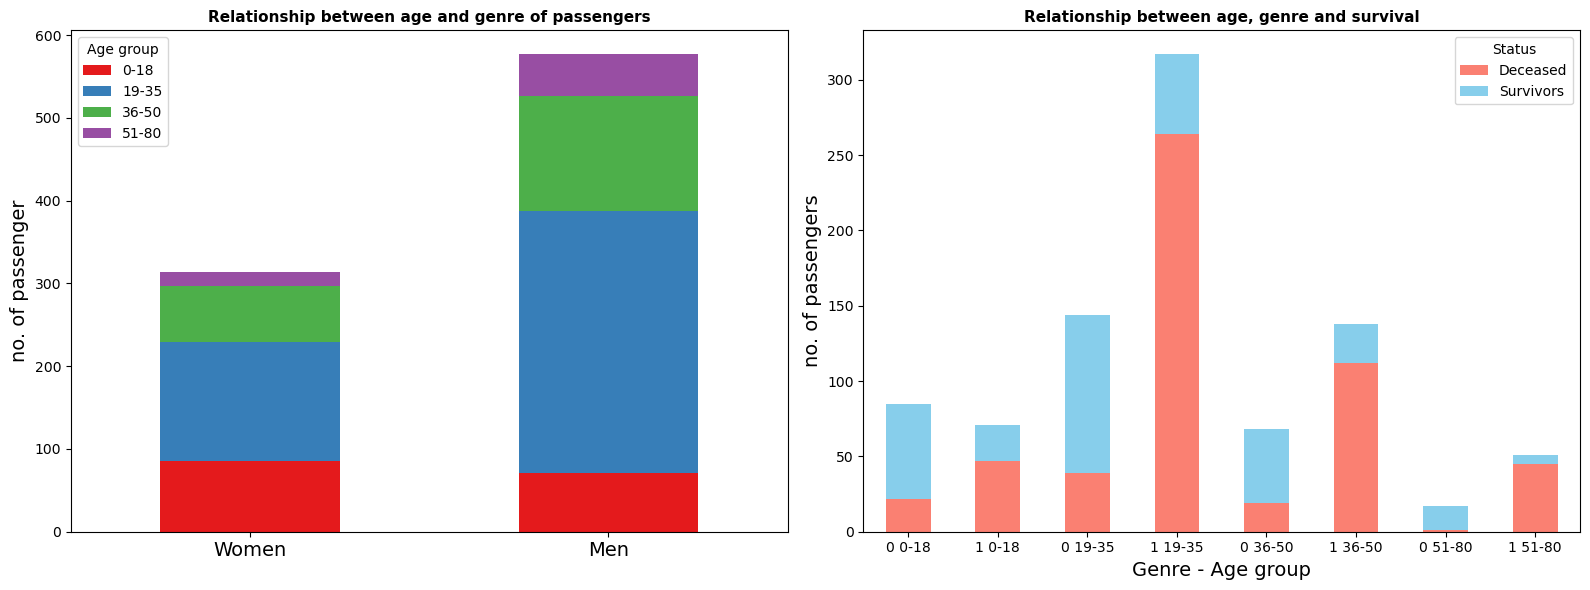

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Statements graph1
age_data = titanic.copy().reset_index()                                                                                                 # we create a copy and reset the dataset index.                                                                         
age_bins = [0, 18, 35, 50, 80]                                                                                                          # we define the age sections.                                                                                                                                                                   
age_labels = ['0-18', '19-35', '36-50', '51-80']                                                                                        # we create the labels and the legend of the sections.                                                       
age_data['age_group'] = pd.cut(age_data['Age'], bins=age_bins, labels=age_labels)                                                       # we create a new series in the copy of the dataset based on Age, group by the groups defined in Age_bins and label with age_labels. 
pivot = age_data.pivot_table(index='Sex', columns='age_group', values='PassengerId', aggfunc='count')                                   # we create a pivot table where the index is 'Sex' the generated columns 'age_group', and the values 'PassengerId' and count them.
sns.set_palette(high_contrast)                                                                                                          # we apply a color palette.

# Statements graph2 
pivot_survived = age_data.pivot_table(index=['age_group', 'Sex'], columns='Survived', values='PassengerId', aggfunc='count')            # we create a pivot table where the index is formed by 'age_group' and 'Sex' the column is formed by 'Survived' and the values are 'PassangerId' and performs the count.

# Graph 1
ax = axs[0]
pivot.plot(kind='bar', stacked=True, ax=ax)                                                                                             # we create a stacked bar chart with the pivot table data.                                                                
ax.set_xlabel('')                                                                                          
ax.set_xticks([0, 1], ['Women', 'Men'], fontsize=14, rotation=0)                                           
ax.set_ylabel('no. of passenger', fontsize=14)                                    
ax.set_title('Relationship between age and genre of passengers', fontdict={'fontsize': 11, 'fontweight': 'bold'})                                                                   
ax.legend(title='Age group')                                                               
fig = ax.get_figure()                                                                                      

# Graph 2
sns.set_palette(survival_color)                                                                                                         # I place here the palette of graph 2 so that it does not conflict.                                                                                                

ax = axs[1]
pivot_survived.plot(kind='bar', stacked=True, ax=ax)                                                                                    # we create a stacked bar chart with the pivot table data.                                                                                                                                                                                           
ax.set_xlabel('Genre - Age group', fontsize=14)                                                                                        
ax.set_xticks(range(len(pivot_survived.index)))                                                                                         # we create a range with the index of pivot_survived for the x-axis ticks.
ax.set_xticklabels([f'{group[1]} {group[0]}' for group in pivot_survived.index], rotation=0)                                            # and now we format a text string with a list compression indicating that we want to concatenate the first element with the second in each group of the index.
ax.set_ylabel('no. of passengers', fontsize=14)
ax.set_title('Relationship between age, genre and survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})         
ax.legend(title='Status', labels=['Deceased', 'Survivors'])   

plt.tight_layout()
plt.show()

Excellent, the results obtained so far provide a very enriching insight.

The first graph presents a visual representation in the form of a stacked bar chart, delineating the various age groups segmented by gender. Through this representation, it is revealed that women make up a slightly higher portion than 50% of the total crew. In addition, a constant trend is observed in all age ranges, where the presence of men outnumbers that of women, except in the youngest crew group.

The second graph, also of stacked bars, sheds light on the distribution of the survival rate as a function of age ranges and gender. This visualization is very rich in substantial information. Notably, it can be seen that in all age categories, the female gender shows a considerable difference in survival rates compared to the male gender, clearly suggesting the implementation of prioritization measures. Likewise, there is a decrease in survival rates among men with increasing age.

Let us continue the analysis to explore the relationship between the age of the crew and their accompaniment of family members during the voyage. I expect that this analysis will allow us to discern whether there is any connection between the age of passengers and the decision to travel with family members, and how this relationship might have influenced survival rates.

We will investigate whether certain groups showed a greater tendency to travel accompanied by relatives and whether this choice influenced their chances of survival. To achieve this, we will break the ages into groups and assess how many passengers in each group traveled with relatives and how many traveled unaccompanied, and compare these figures with the survival rates of each group

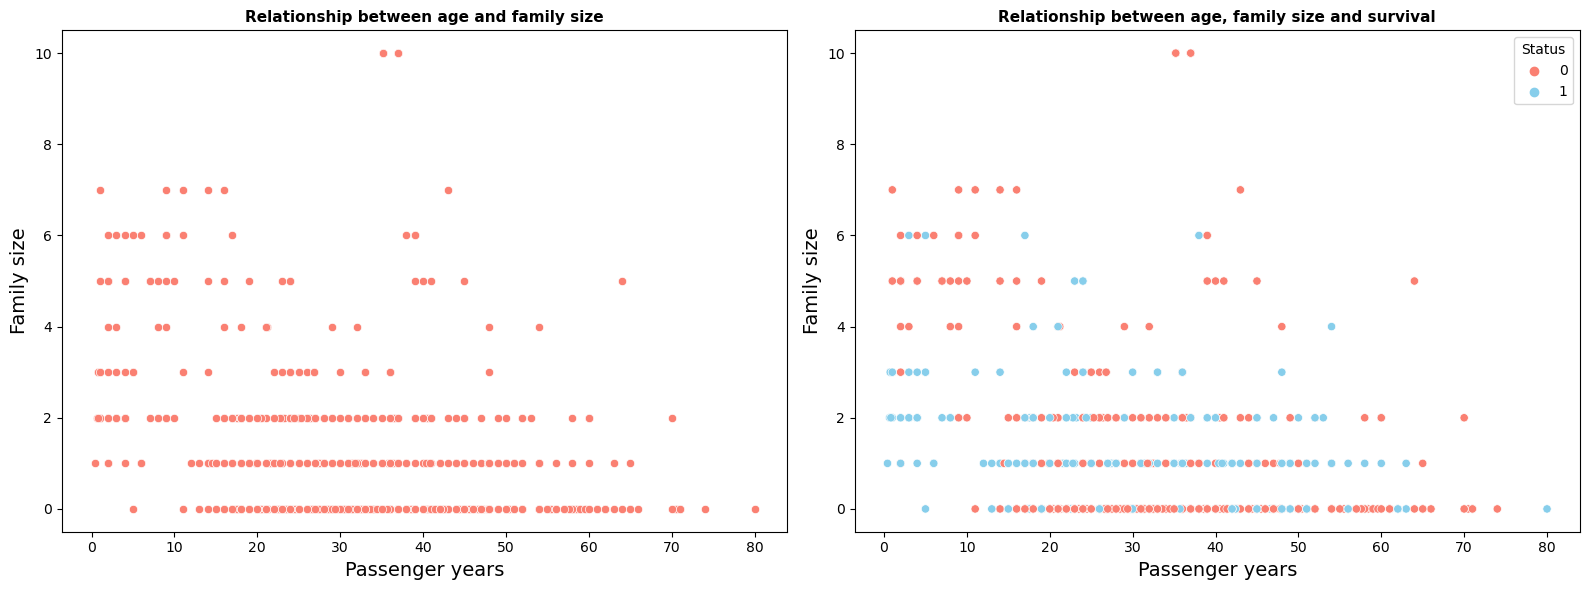

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Statements graph1
age_sibsp_parch = titanic[['Age', 'SibSp', 'Parch']].copy()                                                           # We create a new copy with the variables we will use.
age_sibsp_parch['family_size'] = age_sibsp_parch['SibSp'] + age_sibsp_parch['Parch']                                  # and create a new column with the sum of SibSp and Parch.

# Statements graph2
age_sibsp_survived = age_sibsp_parch.copy()                                                                       
age_sibsp_survived['Survived'] = titanic['Survived']

# Graph1
ax = axs[0]
sns.scatterplot(data=age_sibsp_parch, x='Age', y='family_size', ax=ax)                                                # we create a scatter plot for Age and family_size.
ax.set_xlabel('Passenger years', fontsize=14)
ax.set_ylabel('Family size', fontsize=14)
ax.set_title('Relationship between age and family size', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph 1
ax = axs[1]
sns.scatterplot(data=age_sibsp_survived, x='Age', y='family_size', hue='Survived', ax=ax)                             # we create a scatter plot for Age and family_size by survived.
ax.set_xlabel('Passenger years', fontsize=14)
ax.set_ylabel('Family size', fontsize=14)
ax.set_title('Relationship between age, family size and survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})
ax.legend(title='Status')

plt.tight_layout()
plt.show()

Good. The first scatter plot that visualizes the relationship between the total number of family members per crewmember and their age range. Through this representation, something enlightening is revealed. 
- The majority of crew members choose to travel unaccompanied, as evidenced by the dots clustered around the horizontal axis. 
- Equally noteworthy is the notable presence of those traveling with one or two family members. 
This graph provides a snapshot of how passengers are distributed according to their choice of traveling accompanied or alone, and how this choice is related to their ages.

The next graph, also a scatter plot, presents the application of the survival rate on the previous graph. 
Here, the graphical representation improves by showing how the survival rates are connected to the dots in the previous scatter plot. This visualization sheds light in a remarkable way: 
- Younger age groups experience higher survival rates, which is reflected in the concentration of higher points at the bottom left-hand side of the graph. 
- Furthermore, it clearly highlights how the majority of survivors belong to families of 1 to 3 members, which reinforces the importance of family accompaniment in the context of survival chances.

To conclude the analysis of the 'Age' variable, we will explore the relationship between the age of passengers and the class of ticket they purchased as a function of survival rate. This last analysis will allow us to better understand how age intertwines with ticket class to influence survival rates. 

This analysis will allow us to assess whether certain age groups had higher or lower survival rates in relation to the class of ticket they purchased. We will also be able to identify whether there were specific preferences or policies that influenced survival based on these variables.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


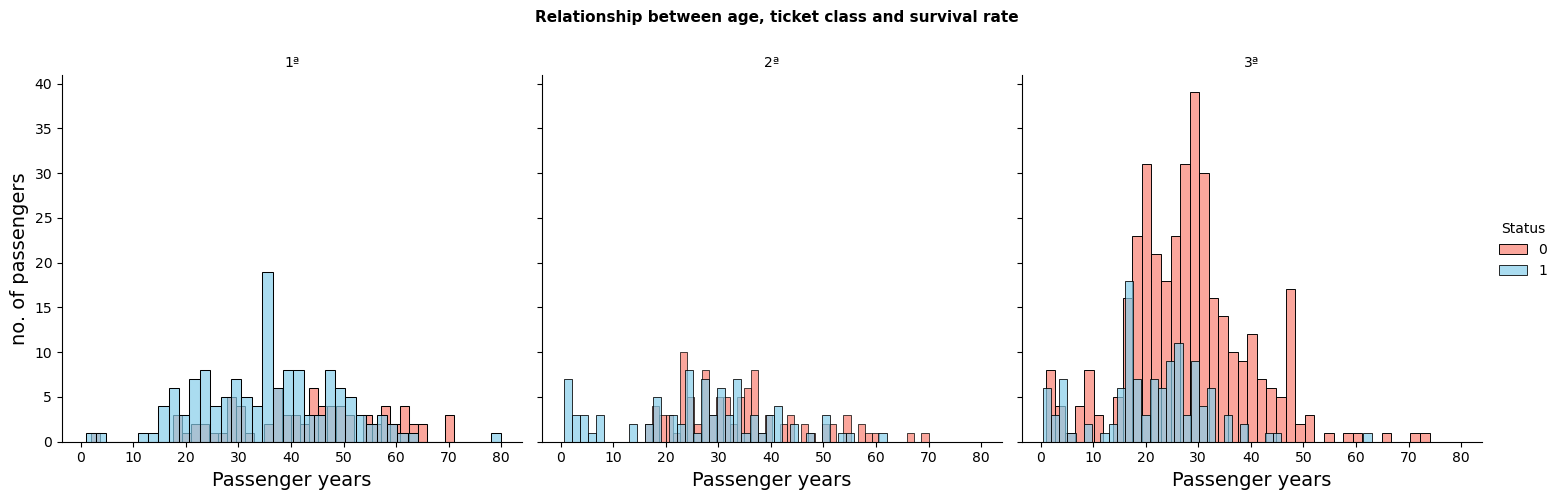

In [36]:
sns.set_palette(survival_color)
survival_rate = titanic.groupby('Pclass')['Survived'].mean()                                                # we create the mean survival rate of each class with the mean survival rate of each class.       
print(survival_rate)

g = sns.FacetGrid(titanic, col='Pclass', hue='Survived', height=5, aspect=1)                                # we create a Facetgrid with the Pclass data by survived and dimensioned.

g.map(sns.histplot, 'Age', bins=40, alpha=0.7)                                                              # we map by creating a histiogram of 40 cells and with transparency.
g.set_axis_labels('Passenger years', 'no. of passengers', fontsize=14)                                      # we create the axis labels.
g.set_titles('{col_name}ª', fontsize=20)                                                                    # we insert the names of each column and add ª.
g.add_legend(title='Status')                                                                                # we customize the title of the legend.
plt.subplots_adjust(top=0.85)                                                                               # We give a spacing.
plt.suptitle('Relationship between age, ticket class and survival rate', fontsize=11, fontweight='bold')    

plt.show()



The informative impact of this graph is indisputable. 

In this triple histogram, we present an enlightening perspective on the distribution of different passenger ages, together with their survival rates, segmented by each class of ticket purchased.

We clearly observe how the survival rate varies significantly by ticket class. First class records a significantly high survival rate of 63%, which decreases as we move down the classes, 47.3% in second class and a notable drop to 24.2% in third class.

A significantly smaller fraction of third class passengers managed to survive compared to those in first class. We can conclude  that:
- only one in four third class passengers survived. 
- while in second class the figure rises to one in two.

This triple histogram clearly summarizes how the combination of age and ticket class influenced survival rates, providing a final piece in our analysis of the influence of age on survival outcome in the tragic Titanic event.

### Sex

Passenger gender

Let us continue our analysis by exploring the 'Sex' series, with the aim of seeking answers that shed light on the cross-relationships with the other variables. This phase will allow us to delve deeper into how passenger gender connects with other key variables and how these may have influenced survival rates.

It consists of:
- no. of passengers by gender
- Relationship between gender and survival Rate
- Relationship between gender and ticket class
- Relationship between gender and ticket class by survival rate
- Relationship between gender and number of parents/children.
- Relationship between gender and number of parents/children by survival

But before we continue, let's make a brief update about the data contained in the 'Sex' series.

In [37]:
total = titanic['Sex'].count()
print('total number of travelers: ', total)

total number of travelers:  891


In [38]:
sex_count = titanic['Sex'].value_counts()
sex_count

Sex
1    577
0    314
Name: count, dtype: int64

Having completed our review of the overall passenger data and the observation of gender distribution in the aggregate, we proceed to visualize these data graphically to obtain a clearer visual representation of survival rates.

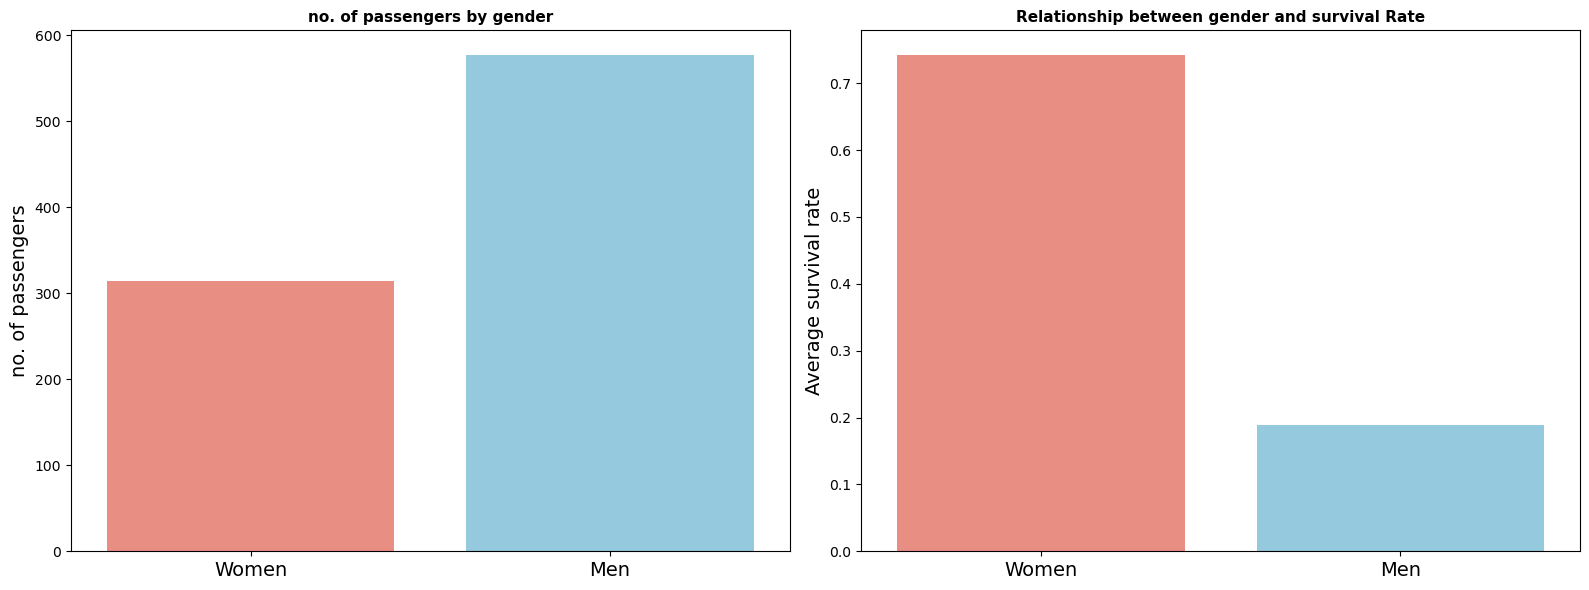

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Statements graph1 
sex_count = titanic['Sex'].value_counts()                                                                               # We create a series containing the sum of the values of Sex.
 
# Statements graph2
sex_surv = titanic.groupby('Sex')['Survived'].mean()                                                                    # We create a variable with the average of Sex.

# Graph1
sns.barplot(x=sex_count.index, y=sex_count.values, ax=axs[0])                                                           # We create a bar chart with the Sex_count index and its values.
axs[0].set_xlabel('')
axs[0].set_xticklabels(['Women', 'Men'], fontsize=14)
axs[0].set_ylabel('no. of passengers', fontsize=14)
axs[0].set_title('no. of passengers by gender', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0].tick_params(axis='x', labelrotation=0)

# Graph2
sns.barplot(x=sex_surv.index, y=sex_surv.values, ax=axs[1])                                                             # We create a bar chart with the Sex_surv index and its values. 
axs[1].set_xlabel('')
axs[1].set_xticklabels(['Women', 'Men'], fontsize=14)
axs[1].set_ylabel('Average survival rate', fontsize=14)
axs[1].set_title('Relationship between gender and survival Rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

The results of this data are extremely interesting.

The first bar chart again reflects the gender distribution of passengers, showing the disparity in the number of men and women aboard the Titanic. This graph reiterates the male numerical preponderance, where the volume of males is approximately twice that of females.

In the second graph, the average survival rate by sex is strikingly presented. Here, despite the previous data, this graph visualizes how about 75% of the women managed to survive in contrast to about 20% of the men. These figures clearly show the significant disparity in survival rates between genders, indicating that the gender variable played a dominant role in survival probabilities

To further contrast the data, let's look at the actual survival rate for each sex.

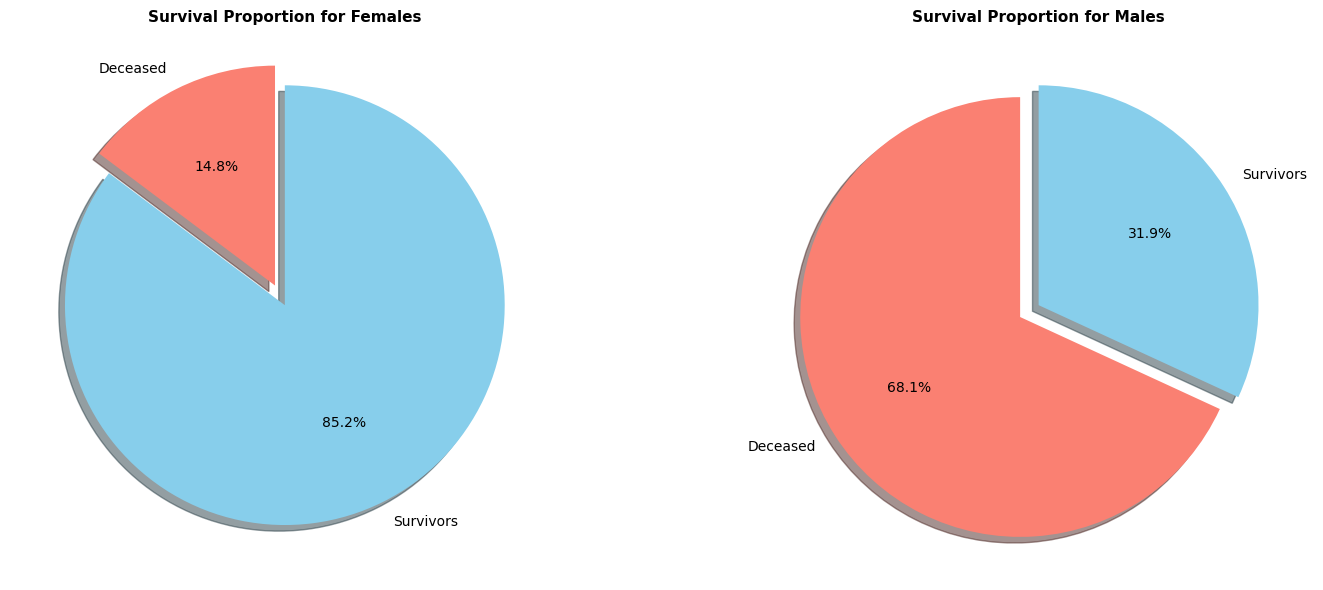

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Statements graph2 
sex = titanic.groupby(['Sex', 'Survived']).size().unstack().copy()                                                                                                # we create a df by grouping sex and survived, we use the copy functions to replicate, size it to give dimension and unstack to extract data.

# Graph1
sex[0].plot(kind='pie', ax=axs[0], labels=['Deceased', 'Survivors'], autopct='%1.1f%%', colors=survival_color, startangle=90, explode=[0.1, 0], shadow=True)      # We create a pie chart with the custom labels, choose the format of a single decimal, the colors, the entry angle, separate the portions and apply shadows.    
axs[0].set_title('Survival Proportion for Females', fontdict={'fontsize': 11, 'fontweight': 'bold'})                                                              
axs[0].set_ylabel('')

# Graph2
sex[1].plot(kind='pie', ax=axs[1], labels=['Deceased', 'Survivors'], autopct='%1.1f%%', colors=survival_color, startangle=90, explode=[0.1, 0], shadow=True)      # We create a pie chart with the custom labels, choose the format of a single decimal, the colors, the entry angle, separate the portions and apply shadows.
axs[1].set_title('Survival Proportion for Males', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

In this pie chart, we see more clearly the actual distribution of survival figures by sex. It is evident that the survival rates for men only reach 32%, so we could say that approximately two out of three men perished in the sinking, while the survival rate for women reaches 85%.

With this in mind, we will continue to delve deeper into this data.

Next we will work on the relationship between gender and the type of ticket purchased by each passenger.

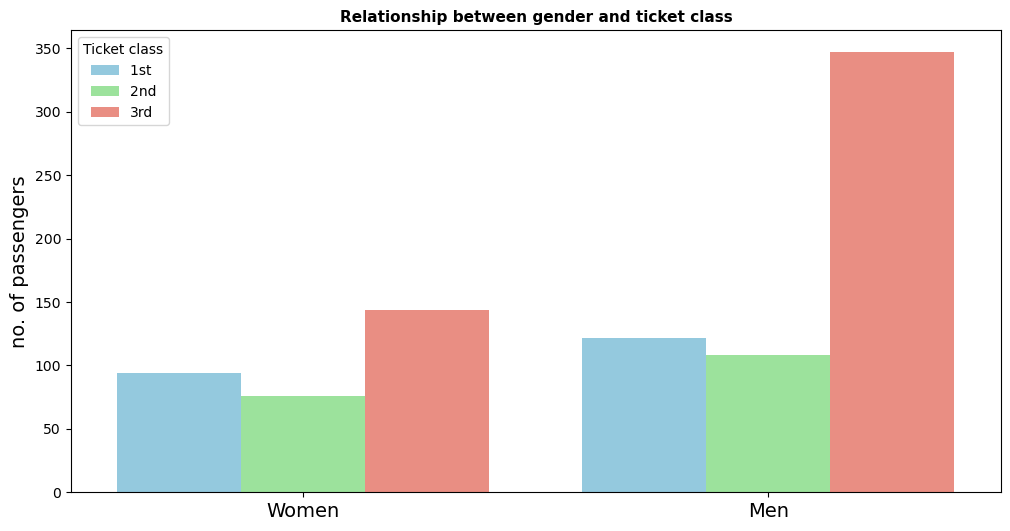

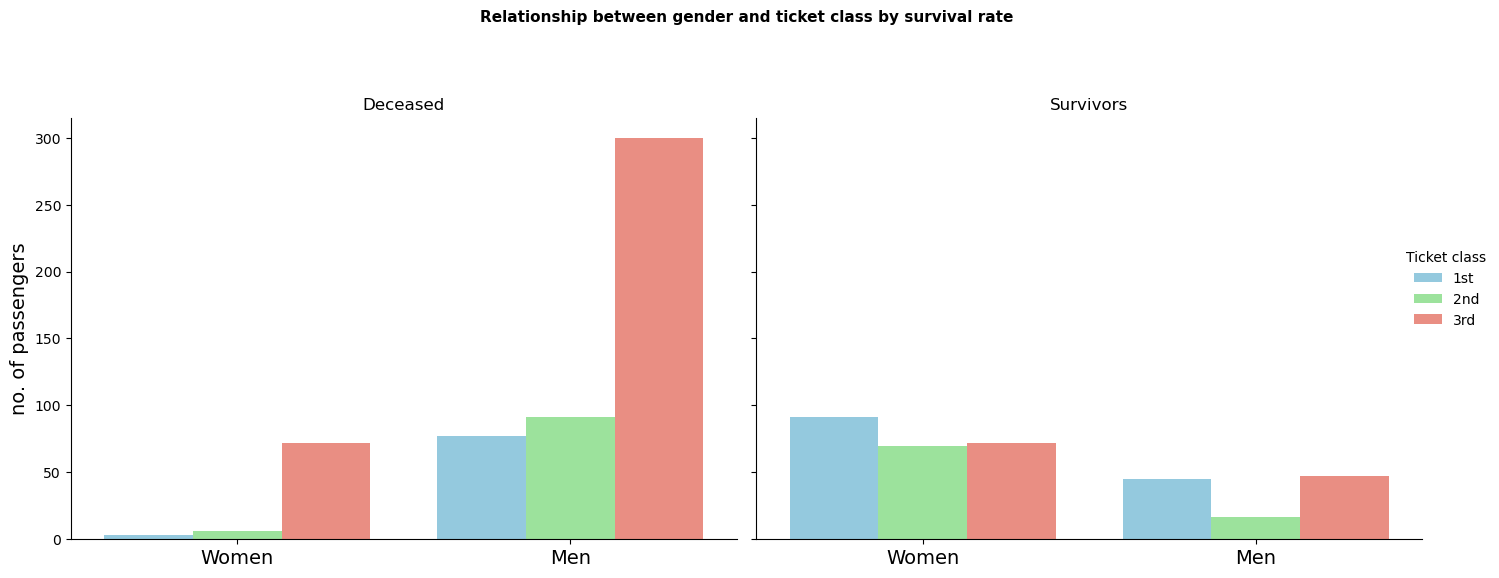

In [41]:
plt.figure(figsize=(12, 6))

# Statements graph2 
titles = ['Deceased', 'Survivors']
labels = ['1st', '2nd', '3rd']

# Graph1
sns.countplot(data=titanic, x='Sex', hue='Pclass', palette=class_color)                                                                   # We generate a bar chart to see the relationship between Gender and Banknote Class, and apply our colors.
plt.xlabel('')
plt.xticks([0, 1], ['Women', 'Men'], fontsize=14)                                                                                         # Replace the X-axis ticks and give size.
plt.ylabel('no. of passengers', fontsize=14)                                                                                
plt.title('Relationship between gender and ticket class', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.legend(title='Ticket class', labels=['1st ', '2nd', '3rd'])                                                                           # We generate a personalized legend with title and the name of the tags.

# Graph2
plot = sns.catplot(data=titanic, x='Sex', hue='Pclass', col='Survived', kind='count', palette=class_color, height=6, aspect=1.2)          # We use catplot to see the relationship between numeric and categorical variables, we indicate that we want a countplot, we give it color and appearance.

for ax, title in zip(plot.axes.flat, titles):                                                                                             # We create a generator that goes through the pairs of the two graphs and titles and assigns the new title to the new title .
    ax.set_title(title)
    
plot.set_ylabels('no. of passengers', fontsize=14)
plot.set_xlabels('')
plot.set_xticklabels(['Women', 'Men'], fontsize=14)
plot._legend.set_title('Ticket class')

for ax2, label in zip(plot._legend.texts, labels):                                                                                        # As before, we create a generator that goes through the pairs of legend values and assigns the new ones.
    ax2.set_text(label)

plt.subplots_adjust(top=0.8)                                                                                                              # We adjust the starting height of the plot.
plt.suptitle('Relationship between gender and ticket class by survival rate', fontsize=11, fontweight='bold', ha='center')                # We give a general title to the graph.

plt.show()

The data that emerge from this analysis are very interesting.

In the first bar chart, we are given an insight into the relationship between the gender of passengers and the class of ticket they purchased. In this graph, a relatively balanced distribution between genders is revealed for each ticket class. A notable observation is the presence of a very low number of second class tickets in both genders, even outnumbering first class. It is particularly striking that, in the case of men, the number of third class passengers considerably exceeds that of women or even the sum of first and second class passengers in the same gender.

In the second bar chart, a division of two charts is presented, one corresponding to casualties and the other to survivors. In examining the graph of fatalities, we reaffirm a previous observation, casualties are low, except for women in third class, who number 75 victims. Among men, the third class records an even higher figure, around 300 casualties, while the figures in the first and second classes remain below 100.

In the survivor graph, a remarkable parity in the number of women stands out, with approximately 75 women each in second and third class. Particularly striking is the high survival rate among women in first class. On the other hand, survival figures among men are significantly lower compared to those among women.

These results provide evidence to theorize that not only gender, but also ticket class, played a crucial role in the differences in survival rates.

Let us continue our analysis by exploring the interaction between passenger gender and the number of parents/children on board. This phase of research will allow us to delve deeper into the application of the 'women and children first' policy in the context of survival rates. We will address the hypothesis that the prioritization of women and children in evacuation was reflected in survival rates as a function of these variables.

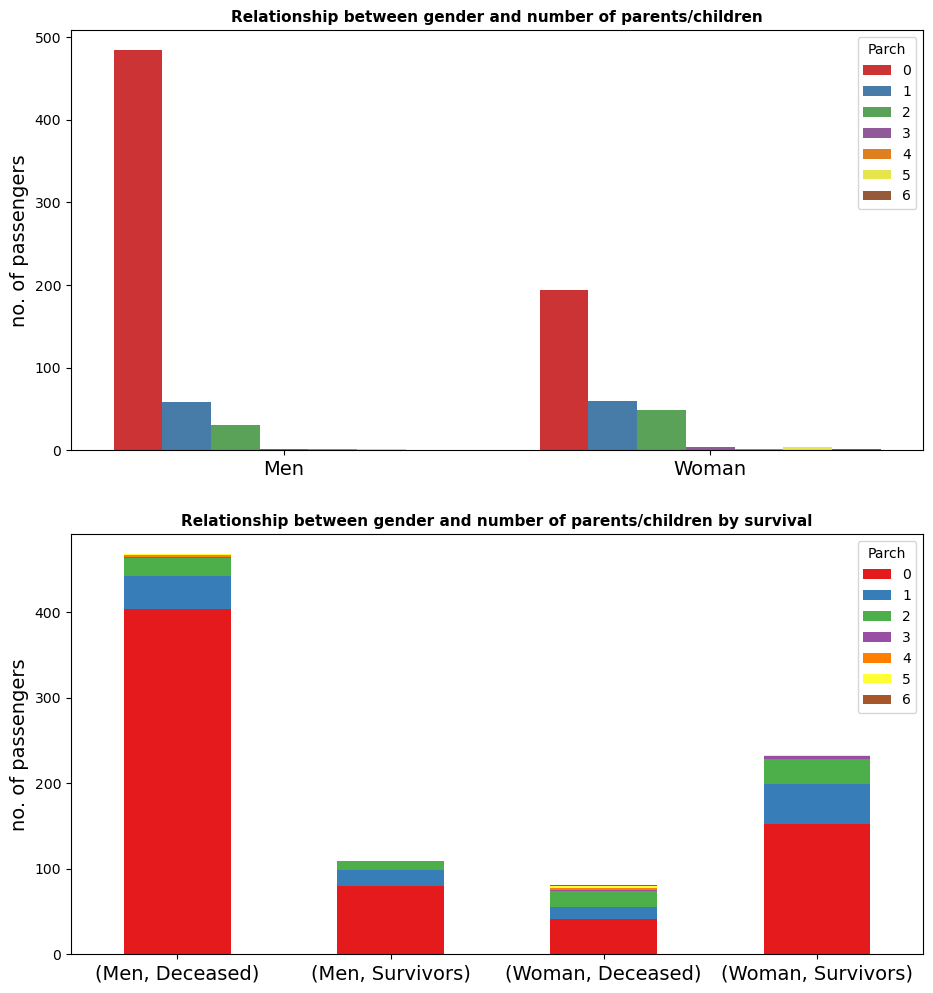

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(11, 12))

# Statements
sns.set_palette(high_contrast)                                                                                                  # We apply a color palette.
titanic_sex = titanic.copy()                                                                                                    # We generate a copy of the DF
titanic_sex['Sex'] = titanic_sex['Sex'].replace({0: 'Woman', 1: 'Men'})                                                         # In the Sex column we substitute the values
titanic_sex['Survived'] = titanic_sex['Survived'].replace({0: 'Deceased', 1: 'Survivors'})                                      # In the Survived column we replace the values... This and the previous should have been done much earlier, but I realized it when the Notebook was almost finished :/
cosstab = pd.crosstab([titanic_sex.Sex, titanic_sex.Survived], titanic_sex.Parch)                                               # We create a cross table with Sex, Survived and patch data.

# Graph1
sns.countplot(data=titanic_sex, x='Sex', hue='Parch', ax=axs[0])                                                                # Generate a bar chart showing the relationship between sex and parch.                                                               
axs[0].set_xlabel('')
axs[0].set_xticklabels(['Men', 'Woman'], fontsize=14)
axs[0].set_ylabel('no. of passengers', fontsize=14)
axs[0].set_title('Relationship between gender and number of parents/children', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph2
cosstab.plot(kind='bar', stacked=True, ax=axs[1])                                                                               # We paint the crosstable as stacked boards.                                                                     
axs[1].set_xlabel('')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, fontsize=14)
axs[1].set_ylabel('no. of passengers', fontsize=14)
axs[1].set_title('Relationship between gender and number of parents/children by survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.show()

The first histogram shows the distribution of passengers traveling with parents or children on board. We observed a common trend in both genders: the majority were traveling without parents or children. Approximately 50 people of each gender were traveling with a parent or child, while the number decreased to about 25 men and less than 50 women in the case of traveling with 2 parents/children. From this point on, very few cases are recorded in both categories.

The following stacked bar chart highlights the comparison of survival rates between genders and traveling with children or parents. In this graph, it can be seen that the survival rate of women with children is higher than that of men in a similar situation.

Although these findings do not yet provide a definitive conclusion, our analysis will continue to explore this theory further. The interaction between gender and the accompaniment of parents or children appears as a crucial aspect to investigate in order to determine whether the 'women and children first' policy influenced survival rates in the context of the shipwreck.

### SibSp and Parch

- **SibSp** number of siblings/spouses on board.
- **Parch** number of parents / children among the passage

In this section we will dive into the analysis of series that quantify the number of parents and children, and siblings and spouse of those who traveled as part of the Titanic's passage. 

Our intention is to further explore the various combinations of family-related data in order to extract valuable insights that will bring us closer to a better understanding of the circumstances of that fateful night and the factors that contributed to the low survival rates.

It consists of:
- Relationship between sibSp and survived
- Relationship between parch and survived
- Relationship between family size and survived
- Relationship between family size and gender
- Relationship between family size, gender and survival rate
- Relationship between family size and age
- Relationship between family size, age and survival

We will start this phase by creating a new table that will allow us to determine the size of the families on board for each passenger. 

To do this, we will sum the quantities present in the 'SibSp' (number of siblings/spouses on board) and 'Parch' (number of parents/children on board) series. This summation will provide us with a more complete understanding of the family dimensions of each individual.

Through this approach, we will be in a position to examine family dynamics in a more holistic context and understand how family size may have influenced evacuation decisions and thus survival rates.

In [43]:
titanic_families = titanic.copy()                                                                # We make a copy of our Dataset.
titanic_families['family_size'] = titanic_families['SibSp'] + titanic_families['Parch']          # we generate a new series from the sum of SibSp and Parch.
titanic_families

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,3,0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,3,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,26.8,1,2,W./C. 6607,23.4500,3,3


We will proceed to graphically represent the information contained in the tables.

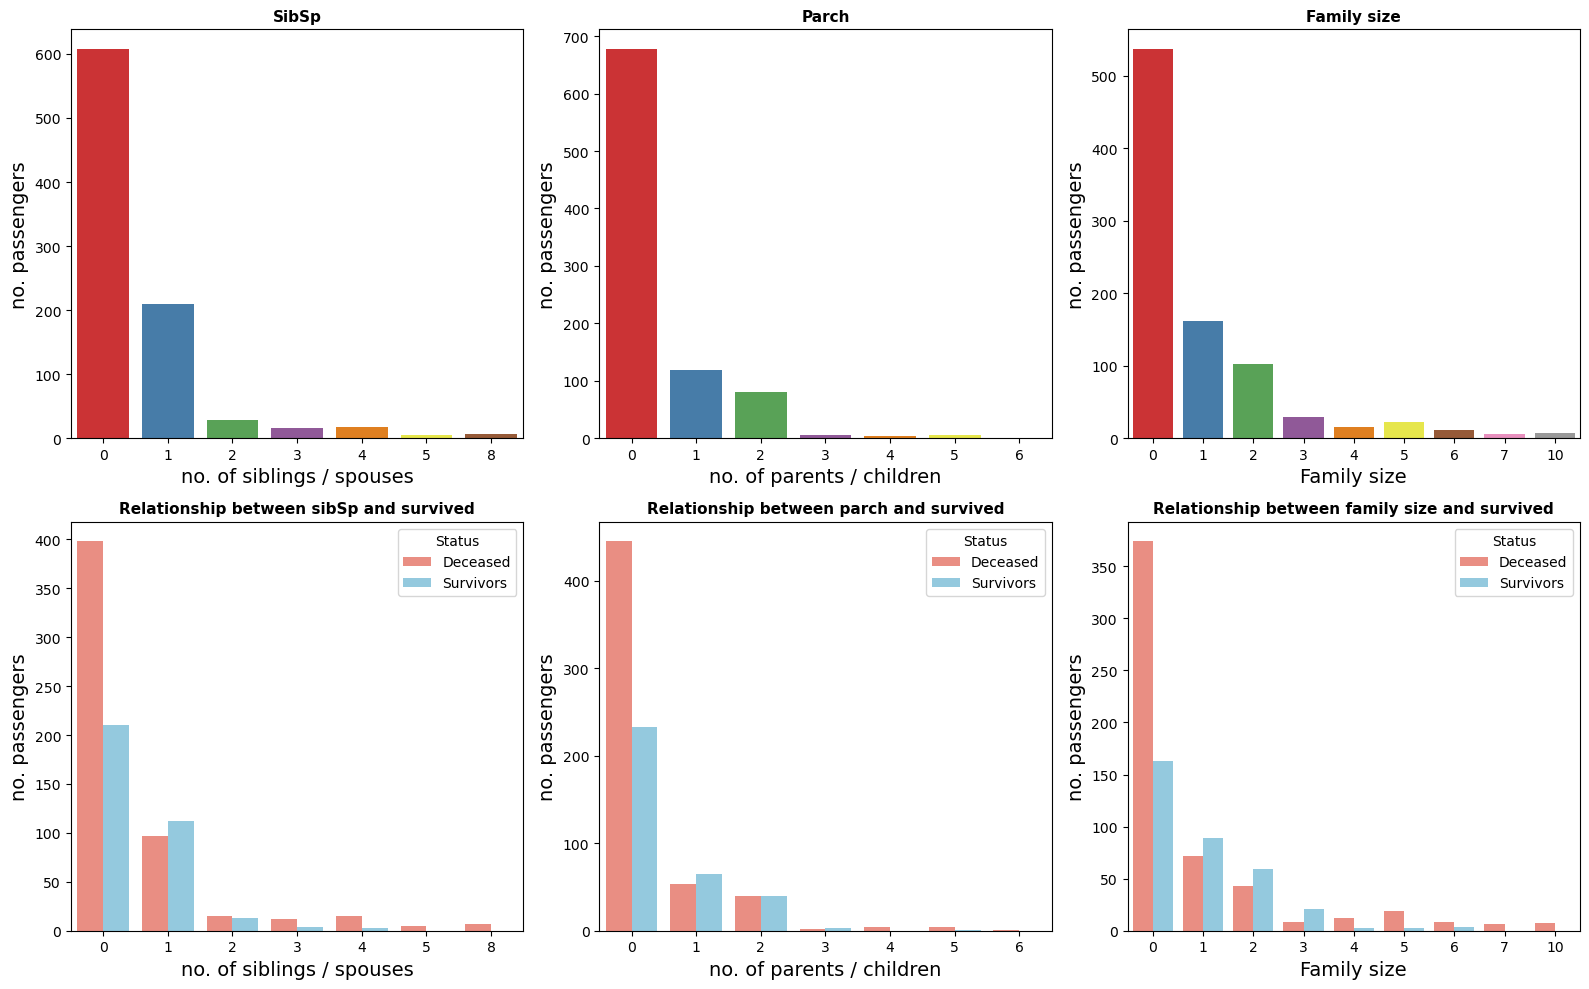

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))                                                                       # We create a 2x3 figure and give it size.

# Graph1
sns.countplot(data=titanic_families, ax=axs[0][0], x='SibSp', palette=high_contrast)                                  # We generate a bar chart to represent the Sibsp group and color it.
axs[0][0].set_xlabel('no. of siblings / spouses', fontsize=14)
axs[0][0].set_ylabel('no. passengers', fontsize=14)
axs[0][0].set_title('SibSp', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph2
sns.countplot(data=titanic_families, ax=axs[0][1], x='Parch', palette=high_contrast)                                  # We generate a bar chart to represent the Parch group and color it.
axs[0][1].set_xlabel('no. of parents / children', fontsize=14)
axs[0][1].set_ylabel('no. passengers', fontsize=14)
axs[0][1].set_title('Parch', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph3
sns.countplot(data=titanic_families, ax=axs[0][2], x='family_size', palette=high_contrast)                            # We generate a bar chart to represent the family_size group and color it.
axs[0][2].set_xlabel('Family size', fontsize=14)
axs[0][2].set_ylabel('no. passengers', fontsize=14)
axs[0][2].set_title('Family size', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph4
sns.countplot(data=titanic_families, ax=axs[1][0], x='SibSp', hue='Survived', palette=survival_color)                 # We generate a bar chart to represent the relationship between Sibsp and Survived, and color it.
axs[1][0].set_xlabel('no. of siblings / spouses', fontsize=14)
axs[1][0].set_ylabel('no. passengers', fontsize=14)
axs[1][0].set_title('Relationship between sibSp and survived', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][0].legend(title='Status', labels=['Deceased', 'Survivors'])                                                    # We create a custom legend, title it and indicate the tags.

# Graph5
sns.countplot(data=titanic_families, ax=axs[1][1], x='Parch', hue='Survived', palette=survival_color)                 # We generate a bar chart to represent the relationship between Parch and Survived, and color it.
axs[1][1].set_xlabel('no. of parents / children', fontsize=14)
axs[1][1].set_ylabel('no. passengers', fontsize=14)
axs[1][1].set_title('Relationship between parch and survived', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][1].legend(title='Status', labels=['Deceased', 'Survivors'])

# Graph6
sns.countplot(data=titanic_families, ax=axs[1][2], x='family_size', hue='Survived', palette=survival_color)           # We generate a bar chart to represent the relationship between family_size and Survived, and color it.
axs[1][2].set_xlabel('Family size', fontsize=14)
axs[1][2].set_ylabel('no. passengers', fontsize=14)
axs[1][2].set_title('Relationship between family size and survived', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][2].legend(title='Status', labels=['Deceased', 'Survivors'])                                 

plt.tight_layout()
plt.show()

Great! This is the best way I have found to graphically show these sets.

Generally speaking, a fairly definite pattern can be observed in all the graphs, where the presence of the traveler with no family members on board predominated.

- In the first graph, which represents the number of siblings or partners on board, it can be seen, as expected, that the dominant figure is one, probably influenced by the large number of couples on board. From this figure onwards, the number drops progressively to eight.
- In the second graph, concerning parents and children, it is noticeable that travelers who did not travel alone were generally accompanied by 1 or 2 parents or children. From this figure onwards, the number decreases drastically until reaching the maximum number of six.
- The following graph shows the family sizes, resulting from the sums of the previous ones. Here it can be seen that individual travel prevailed, as we already knew, and that small families of 1 to 2 members predominated. From the third member onwards, the ratio decreases and remains relatively stable until it reaches the figure of 10 members.

Graphs 3 to 6 represent the interaction of the above variables with the variable 'Survived'. We can highlight that:
- The survival rate of those passengers who traveled alone is around 50% in all graphs.
- In the graph of siblings or couples, only those with a companion show a survival rate that exceeds the mortality rate; in the other cases it is lower.
- It is noteworthy that in the graph of parents and children, the number of survivors exceeds the number of deaths in groups 1 to 3.
- Finally, in the graph representing family size, we can see how small families of 1 to 3 members are favored, these being the only groups in which the survival rate significantly exceeds that of the deceased.

All this suggests to me that there are indications that families with children and/or with few members were more likely to survive.

To further understand these patterns, I believe it is essential to analyze how they relate to the gender variable.

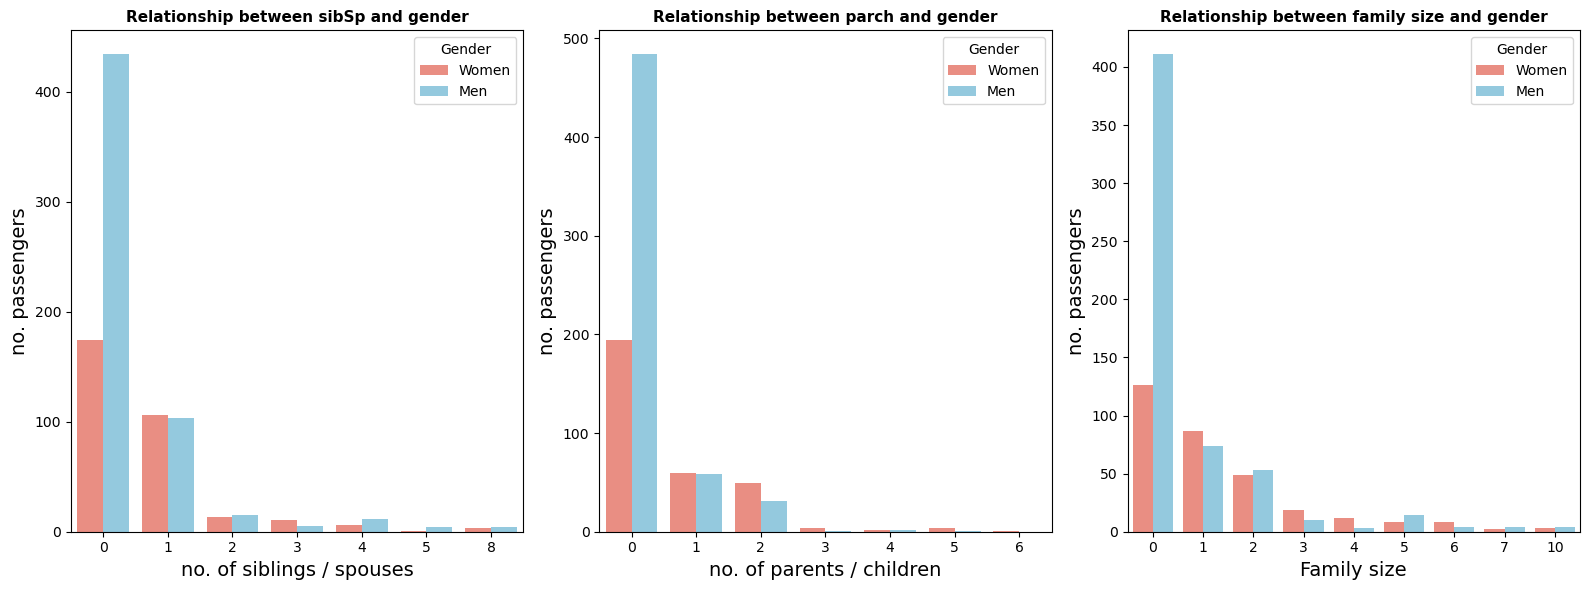

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Graph1
sns.countplot(data=titanic_families, ax=axs[0], x='SibSp', hue='Sex', palette=survival_color)                       # We create a bar chart that counts the number of SibSp and divides by gender.
axs[0].set_xlabel('no. of siblings / spouses', fontsize=14)
axs[0].set_ylabel('no. passengers', fontsize=14)
axs[0].set_title('Relationship between sibSp and gender', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0].legend(title='Gender', labels=['Women', 'Men'])                                                             

# Graph2
sns.countplot(data=titanic_families, ax=axs[1], x='Parch', hue='Sex', palette=survival_color)                       # We create a bar chart that counts the number of Parch and divides by gender.
axs[1].set_xlabel('no. of parents / children', fontsize=14)
axs[1].set_ylabel('no. passengers', fontsize=14)
axs[1].set_title('Relationship between parch and gender', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Gender', labels=['Women', 'Men'])

# Graph3
sns.countplot(data=titanic_families, ax=axs[2], x='family_size', hue='Sex', palette=survival_color)                 # We create a bar chart that counts the number of family_size and divides by gender.
axs[2].set_xlabel('Family size', fontsize=14)
axs[2].set_ylabel('no. passengers', fontsize=14)
axs[2].set_title('Relationship between family size and gender', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[2].legend(title='Gender', labels=['Women', 'Men'])

plt.tight_layout()
plt.show()

This set of three graphs allows us to visualize in a simple way the relationship between the various family variables and gender, thus facilitating comparisons between them.

- By analyzing the graphs, we can deduce that the majority of passengers traveling alone were male, representing more than half of this segment.

- In the graph showing the relationship between siblings/spouses, the groups remain fairly balanced until the number of four members is reached, where a predominance of male components is observed. On the other hand, in the parents/children graph, the preponderance is slightly greater for women.

- It is noteworthy that, in the graph representing family size as a whole, the number of women is significantly higher than that of men.

From these results, we could theorize that families with children tended to travel primarily with their mother. In contrast, in the case of siblings or spouses, the distribution was more balanced.

We will now proceed to compare these data with the survival and mortality rates for each segment.

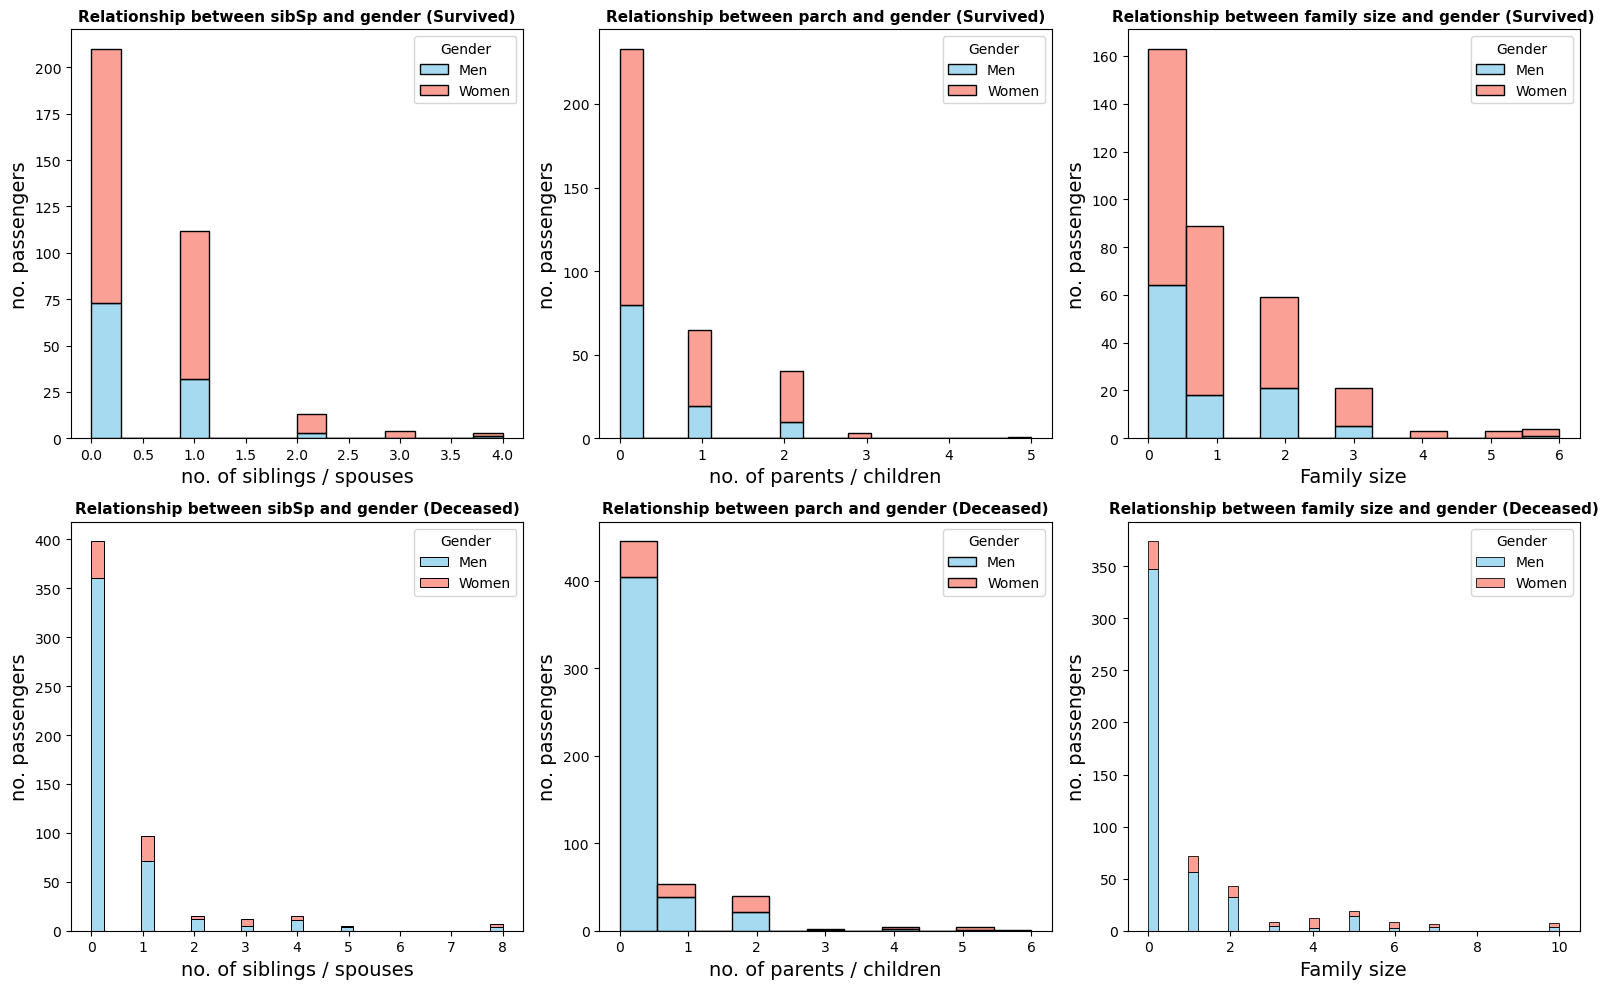

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Graph1
sns.histplot(data=titanic_families[titanic_families['Survived'] == 1], ax=axs[0][0], x='SibSp', hue='Sex', multiple='stack', palette=survival_color)              # We create a stacked histiogram where we select only the survivors and represent SibSp by gender, then use our palette.
axs[0][0].set_xlabel('no. of siblings / spouses', fontsize=14)                                                                                                    # Don't ask me why decimal numbers come out, I have spent a couple of days on this bug. I've searched for info and I've been looking around the data to see where to attack it with no result... I guess it's one of those 'magic' things in the code. ¯\_(ツ)_/¯
axs[0][0].set_ylabel('no. passengers', fontsize=14)                                                                                                               # I would appreciate some light on the subject :)
axs[0][0].set_title('Relationship between sibSp and gender (Survived)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0][0].legend(title='Gender', labels=['Men', 'Women'])

# Graph2
sns.histplot(data=titanic_families[titanic_families['Survived'] == 1], ax=axs[0][1], x='Parch', hue='Sex', multiple='stack', palette=survival_color)              # We create a stacked histiogram in which we select only the survivors and represent Parch by gender, and then use our palette.
axs[0][1].set_xlabel('no. of parents / children', fontsize=14)
axs[0][1].set_ylabel('no. passengers', fontsize=14)
axs[0][1].set_title('Relationship between parch and gender (Survived)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0][1].legend(title='Gender', labels=['Men', 'Women'])

# Graph3
sns.histplot(data=titanic_families[titanic_families['Survived'] == 1], ax=axs[0][2], x='family_size', hue='Sex', multiple='stack', palette=survival_color)        # We create a stacked histiogram in which we select only the survivors and represent the family sizes by gender, and then use our palette.
axs[0][2].set_xlabel('Family size', fontsize=14)
axs[0][2].set_ylabel('no. passengers', fontsize=14)
axs[0][2].set_title('Relationship between family size and gender (Survived)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0][2].legend(title='Gender', labels=['Men', 'Women'])

# Graph4
sns.histplot(data=titanic_families[titanic_families['Survived'] == 0], ax=axs[1][0], x='SibSp', hue='Sex', multiple='stack', palette=survival_color)              # We create a stacked histiogram where we select only the deceased and represent SibSp by gender, then use our palette.     
axs[1][0].set_xlabel('no. of siblings / spouses', fontsize=14)
axs[1][0].set_ylabel('no. passengers', fontsize=14)
axs[1][0].set_title('Relationship between sibSp and gender (Deceased)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][0].legend(title='Gender', labels=['Men', 'Women'])

# Graph5
sns.histplot(data=titanic_families[titanic_families['Survived'] == 0], ax=axs[1][1], x='Parch', hue='Sex', multiple='stack', palette=survival_color)              # We create a stacked histiogram where we select only the deceased and represent Parch by gender, then use our palette.
axs[1][1].set_xlabel('no. of parents / children', fontsize=14)
axs[1][1].set_ylabel('no. passengers', fontsize=14)
axs[1][1].set_title('Relationship between parch and gender (Deceased)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][1].legend(title='Gender', labels=['Men', 'Women'])

# Graph6
sns.histplot(data=titanic_families[titanic_families['Survived'] == 0], ax=axs[1][2], x='family_size', hue='Sex', multiple='stack', palette=survival_color)        # We create a stacked histiogram where we select only the deceased and represent family sizes by gender, then use our palette.
axs[1][2].set_xlabel('Family size', fontsize=14)
axs[1][2].set_ylabel('no. passengers', fontsize=14)
axs[1][2].set_title('Relationship between family size and gender (Deceased)', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1][2].legend(title='Gender', labels=['Men', 'Women'])

plt.tight_layout()
plt.show()

Excellent. This data is extremely interesting.

The graphs clearly indicate that there were significant differences, as we already knew, in survival rates between men and women. 

Women were more likely to survive than men, regardless of the number of siblings/spouses, parents/children or family size.

We will now proceed to examine whether there is any correlation with respect to the age variable. Let's see what we can find.

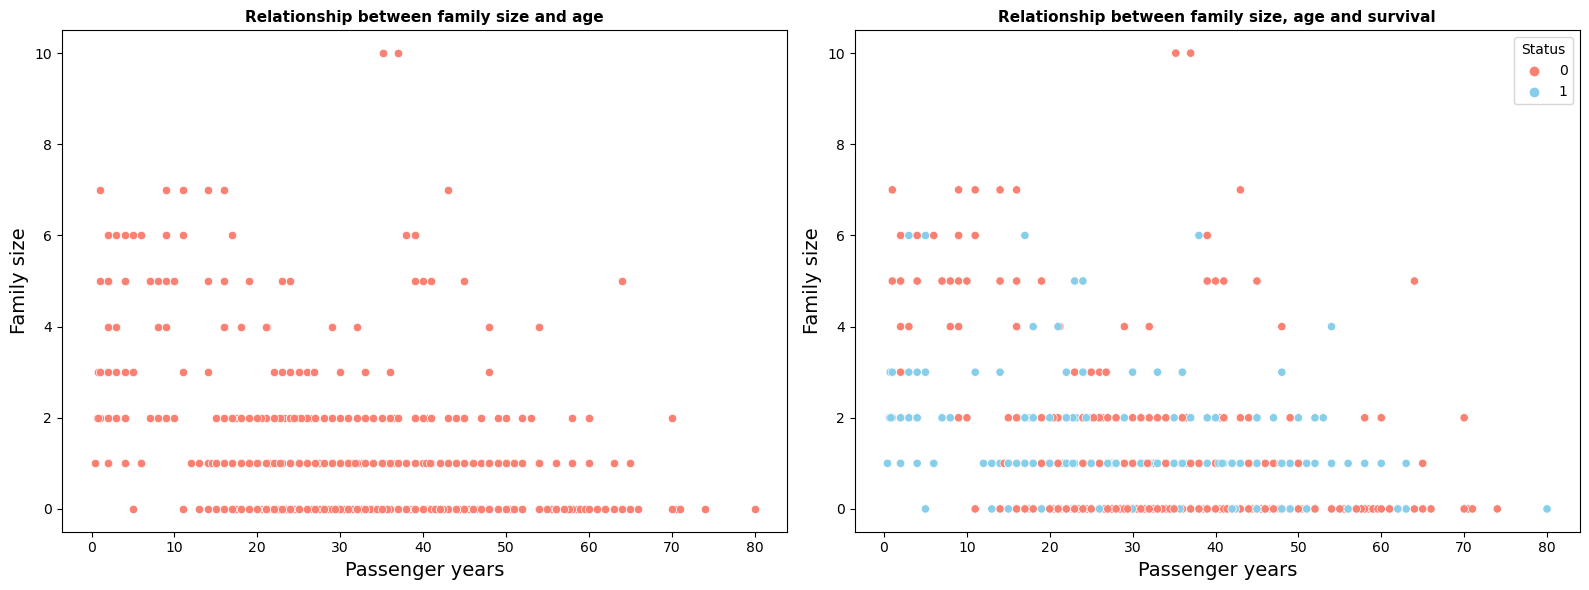

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graph1
sns.scatterplot(data=titanic_families, ax=axs[0], x='Age', y='family_size', color='Salmon')                                                    #  We create a scatter plot with the age and family size data and color it.
axs[0].set_xlabel('Passenger years', fontsize=14)
axs[0].set_ylabel('Family size', fontsize=14)
axs[0].set_title('Relationship between family size and age', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Graph2 
sns.scatterplot(data=titanic_families, ax=axs[1], x='Age', y='family_size', hue='Survived', palette=survival_color)                            # We create a histiogram with the Age and family size data by survived, we color it.                        
axs[1].set_xlabel('Passenger years', fontsize=14)
axs[1].set_ylabel('Family size', fontsize=14)
axs[1].set_title('Relationship between family size, age and survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})                     
axs[1].legend(title='Status')                                                                                                                   # Seaborn doesn't want to color my custom labels correctly T-T 

plt.tight_layout()                                                                                                                         
plt.show()

Great.

The first scatter plot presents us with the distribution of passenger age by family size. Here we can see that the age range above 50 years was dominated by single travelers. It can also be noted that most of the families have members under 30 years of age.

In the second scatter plot, the same data is presented, but this time the filter of the variable 'Survived' is applied. Here we highlight the survival of small families, composed of 1 to 3 members, compared to the rest of the passage.

These findings, added to the previous data, suggest that the rescue efforts were oriented towards the segments of women and families with a small number of members.

### Fare and Pclass

- **Fare** - Price paid for the ticket.
- **Pclass** - Class of ticket purchased.

We come to the last chapter of our exploration and analysis, focused on the two series that, in my opinion, and based on the theories and data extracted so far, will be the most decisive and enlightening. The 'Fare' and 'Pclass' series represent the price and category of the ticket purchased by each passenger. By cross-referencing these variables with others, we will seek to gain a deeper insight into the factors that influenced survival rates.

It consists of:
- Price list of the tickets
- Relationship between ticket prices and survival rate
- Relation of the type of ticket purchased
- Relationship of the type of ticket purchased and survival rate
- Relationship between ticket purchased and class
- Relationship between age and ticket price per survived
- Relationship between family size and ticket class
- Relationship between family size and survival rate

As part of our usual process, we will proceed to review and refresh the data before undertaking the detailed analysis.

In [48]:
titanic_fare = titanic.copy()                                         # We create a working copy.
print(titanic_fare[['Fare']].describe())                              # we consult the general statistics of the Fare series.
print('\n','-'*20, '\n')                                              # separator.
print(titanic_fare['Pclass'].value_counts())                          # we count the number of securities in the Pclass series.

             Fare
count  891.000000
mean    32.204208
std     49.693429
min      0.000000
25%      7.910400
50%     14.454200
75%     31.000000
max    512.329200

 -------------------- 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Excellent, we begin with an initial sketch of how the data is distributed in the 'Fare' series. We observe a wide disparity in ticket prices. It is striking to note that some passengers paid nothing for their ticket, while others shelled out as much as £512 or pounds for their ticket. The distribution is highly skewed, with a median of 32.20, suggesting that most prices are concentrated at the lower end of the spectrum, while a few cases show very high fares.

On the other hand, in the value count of the 'PClass' series, we confirm what we had previously observed: the predominance of third class tickets, followed by first class, and a notably lower proportion of second class tickets.

We will proceed to visualize the data graphically to gain a clearer perspective. We will begin by examining the relationship between ticket price and survival rate.

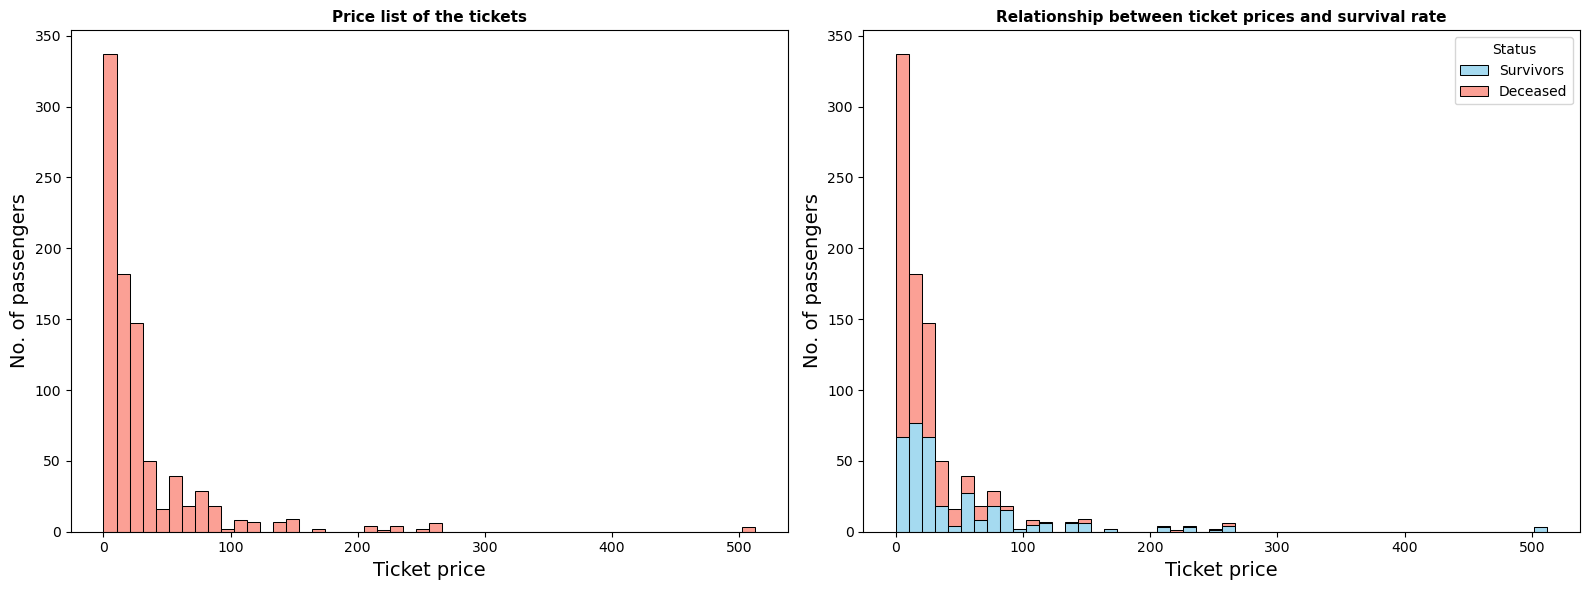

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=titanic_fare, x='Fare', bins=50, ax=axs[0], color="Salmon")                                                  # We create a histiogram with the Fare series and give it 50 divisions and assign it position. 
axs[0].set_xlabel('Ticket price', fontsize=14)
axs[0].set_ylabel('No. of passengers', fontsize=14)
axs[0].set_title('Price list of the tickets', fontdict={'fontsize': 11, 'fontweight': 'bold'})

sns.histplot(data=titanic_fare, x='Fare', hue='Survived', multiple='stack', bins=50, ax=axs[1], palette=survival_color)        # We create a histogram with the Fare per Survived data, stack it, give it 50 spaces, assign position and color.
axs[1].set_xlabel('Ticket price', fontsize=14)
axs[1].set_ylabel('No. of passengers', fontsize=14)
axs[1].set_title('Relationship between ticket prices and survival rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Status', labels=['Survivors', 'Deceased'])

plt.tight_layout()
plt.show()

As we anticipated, the visualization confirms our theory. 

We observe a high concentration of low-cost tickets, which aligns with the preponderance of third-class tickets. The majority of the passage paid between 0 and 30 for their tickets. Notably, after 250 no further purchases are recorded until we reach the 500 range.

In the second graph, we appreciate the marked difference in survival rate percentages between the lowest value bills and the rest. This difference in survival rate suggests that bill price may have played a role in evacuation decisions and resource allocation during the wreck. 

These initial results support our intention to further explore the relationship between ticket price and survival rates.

We will continue to explore the relationship between tickets purchased and the class to which they belong, along with survival statistics.

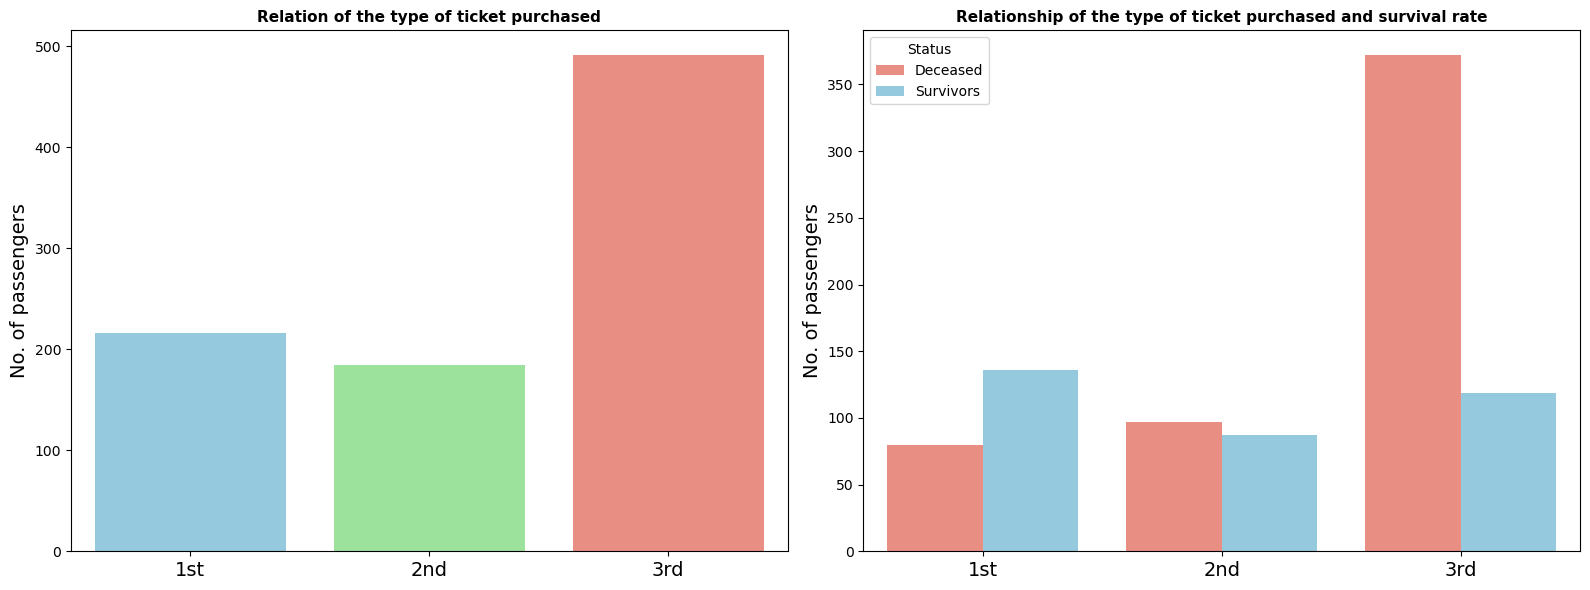

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=titanic_fare, x='Pclass', ax=axs[0], palette=class_color)                                                           # We create a histiogram of categorical data to count the total number of tickets per class. 
axs[0].set_xlabel('')                                                                                                                  
axs[0].set_xticks([0,1,2], ['1st', '2nd', '3rd'], fontsize=14)                                                                                       
axs[0].set_ylabel('No. of passengers', fontsize=14)
axs[0].set_title('Relation of the type of ticket purchased', fontdict={'fontsize': 11, 'fontweight': 'bold'})

sns.countplot(data=titanic_fare, x='Pclass', hue='Survived', ax=axs[1], palette=survival_color)                                        # We created a histiogram of categorical data to count the total number of survivors for each ticket purchased.
axs[1].set_xlabel('')                                                                                                                  
axs[1].set_xticks([0,1,2], ['1st', '2nd', '3rd'], fontsize=14)                                                                                                                                                    
axs[1].set_ylabel('No. of passengers', fontsize=14)
axs[1].set_title('Relationship of the type of ticket purchased and survival rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Status', labels=['Deceased', 'Survivors'])

plt.tight_layout()
plt.show()

The first graph represents the data we have previously observed, confirming again that the number of third class tickets exceeds the sum of first and second class tickets.

The second histogram visualizes the relationship between the survival rate and the class of ticket purchased. In this graph, we reaffirm the observed trend, where the third class experiences a notably lower survival rate. Furthermore, it is evident that priority was given to first class passengers, as the survival rate in this category exceeds 60%, followed by second class with just under 50%. These findings give us a clearer perspective on how ticket category influenced survival rates.

We will proceed to deepen the analysis by exploring the data in relation to the price of the ticket and the class to which it belongs. In addition, we will compare the survival rates with the aim of identifying any significant patterns.

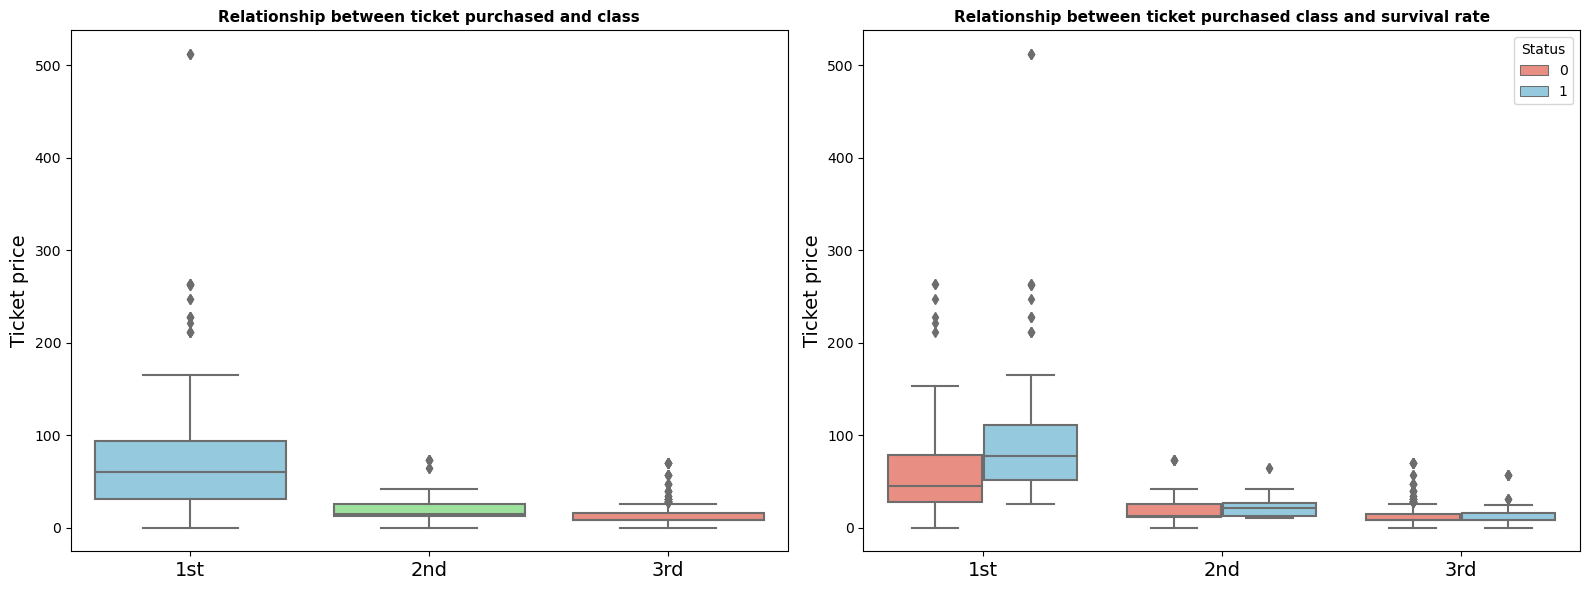

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=titanic_fare, x='Pclass', y='Fare', ax=axs[0], palette=class_color)                                                   # We created a box plot to relate the Pclass and Fare data.
axs[0].set_xlabel('')                                                                                                                  
axs[0].set_xticks([0,1,2], ['1st', '2nd', '3rd'], fontsize=14)                                                                            
axs[0].set_ylabel('Ticket price', fontsize=14)
axs[0].set_title('Relationship between ticket purchased and class', fontdict={'fontsize': 11, 'fontweight': 'bold'})

sns.boxplot(data=titanic_fare, x='Pclass', y='Fare', hue='Survived', ax=axs[1], palette=survival_color)                                # we create a box plot with the Pclass and Fare per Survived data.
axs[1].set_xlabel('')                                                                                                                  
axs[1].set_xticks([0,1,2], ['1st', '2nd', '3rd'], fontsize=14)                                                                              
axs[1].set_ylabel('Ticket price', fontsize=14)
axs[1].set_title('Relationship between ticket purchased class and survival rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Status')

plt.tight_layout()
plt.show()

The data we have obtained are extremely interesting. 

In the first box plot, there is a visual representation of how fares are distributed according to the class of ticket purchased. In all classes, outliers can be observed outside the boxes, indicating that some passengers paid prices well above the typical range for their category. In third and second class, the tills are tightly closed due to the concentration of low prices in these categories. However, in first class, the box is wider due to the greater disparity in prices paid.

In the second box plot, we explore the relationship between ticket price and class, and how it relates to the survival rate. In this visualization, we can see that, in general, passengers who paid less for tickets in the first and second class categories were less likely to survive. However, in third class, this relationship seems to be less relevant, linked to the low price concentration per ticket.

we continue to make progress in exploring the relationship between passenger age, ticket price and mortality rate.

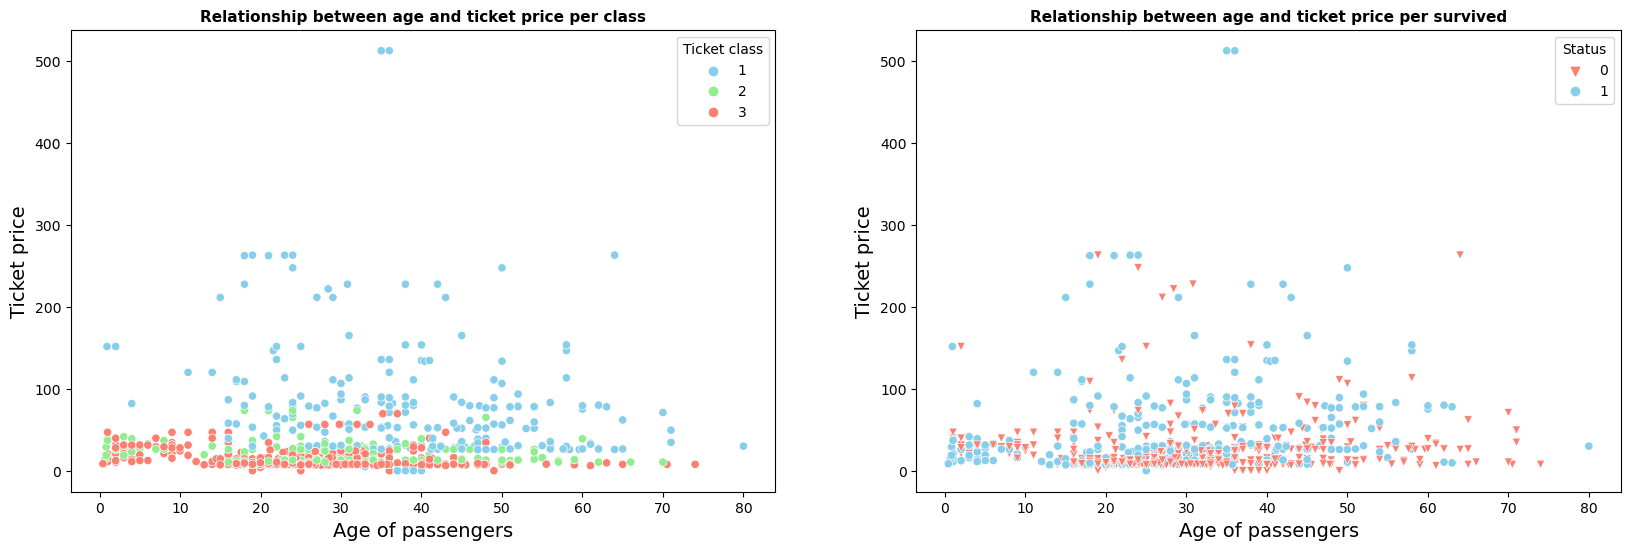

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=titanic_fare,x='Age', y='Fare', hue='Pclass',  ax=axs[0], palette=class_color)                                            # We create a scatterplot with the Fare Age and Fare per Pclass data, assign position and color.
axs[0].set_xlabel('Age of passengers', fontsize=14)
axs[0].set_ylabel('Ticket price', fontsize=14)
axs[0].set_title('Relationship between age and ticket price per class', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[0].legend(title='Ticket class')

sns.scatterplot(data=titanic_fare, x='Age', y='Fare', hue='Survived', style='Survived', ax=axs[1], palette=survival_color, markers=['v','o'])  # We create a scatterplot with the Fare Age and Fare per Pclass data, assign position and color.
axs[1].set_xlabel('Age of passengers', fontsize=14)
axs[1].set_xlabel('Age of passengers', fontsize=14)
axs[1].set_ylabel('Ticket price', fontsize=14)
axs[1].set_title('Relationship between age and ticket price per survived', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Status')

plt.show()

The first scatter plot shows the distribution of passenger ages according to ticket fares and corresponding class. It is consistent with expectations to observe a significant accumulation of third class tickets in the lower price ranges and in the left half of the graph. This suggests that the majority of passengers who purchased third class tickets were under 40 years of age. In addition, an interaction between second class and third class prices is observed in several age ranges. There are also scattered instances of first class tickets at very low prices.

In the second scatter plot, we analyze fares and passenger ages in relation to the survival rate. We evidence two distinct groupings. One is in the 0-8 age band, where we see a compact group with higher survival rates. On the other hand, in the age range 18 to 75 years and with lower rates, there is a more dispersed grouping that mostly represents the deceased.

Based on these results, we can hypothesize that children and those passengers who purchased higher priced first class tickets had higher chances of survival compared to other groups.

We will continue the analysis by exploring the relationship between passenger gender, ticket fare and survival rate.

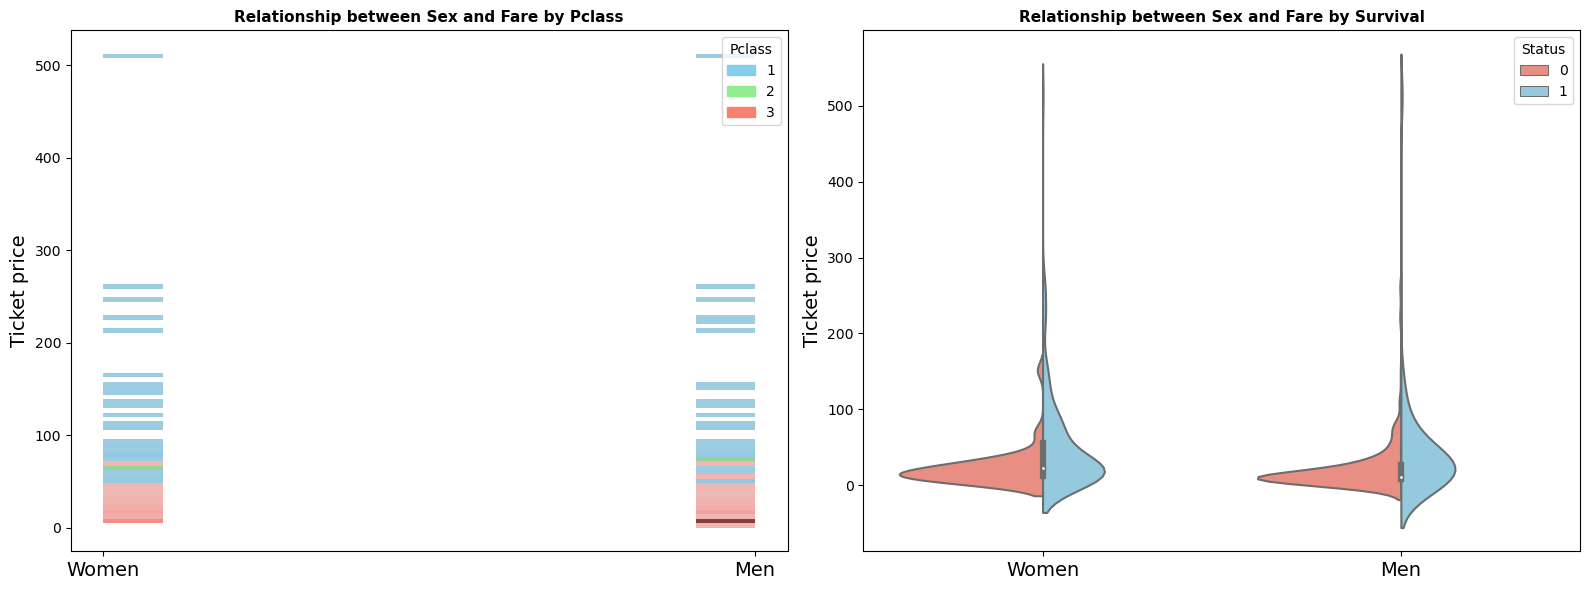

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=titanic, x='Sex', hue='Pclass', multiple='stack', y='Fare', ax=axs[0], palette=class_color)               # We create a stacked histiogram with the Sex and Fare data by Pclass.
axs[0].set_xlabel('')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Women', 'Men'], fontsize=14)
axs[0].set_ylabel('Ticket price', fontsize=14)
axs[0].set_title('Relationship between Sex and Fare by Pclass', fontdict={'fontsize': 11, 'fontweight': 'bold'})

sns.violinplot(data=titanic, x='Sex', y='Fare', hue='Survived',split=True, ax=axs[1], palette=survival_color)               # we created a split violin to represent Sex and Fare by survived.
axs[1].set_xlabel('')
axs[1].set_xticks([0, 1], ['Women', 'Men'], fontsize=14)
axs[1].set_ylabel('Ticket price', fontsize=14)
axs[1].set_title('Relationship between Sex and Fare by Survival', fontdict={'fontsize': 11, 'fontweight': 'bold'})
axs[1].legend(title='Status')

plt.tight_layout()
plt.show()

In the first graph, a stacked histogram representing the distribution of gender and class of ticket purchased by the passage is presented. It is segmented by the class to which they belong. In this graph, it again highlights the majority of males who purchased third class tickets in the price range around £20. In addition, there is a fairly even distribution of prices between the sexes, with a preponderance of third class tickets up to around £50. From that point, prices vary between the three ticket classes, with an increase in first class tickets around £90.

The second graph, which is represented by a violin split graph, explores the relationship between gender, ticket price paid and survival rate. In this graph, it is apparent that survival rates appear relatively balanced across genders. However, a clear trend towards higher mortality in the lower classes in terms of ticket price is evident.

Let's continue our exploration to examine the relationship between ticket fares, family size, ticket class and survival rate

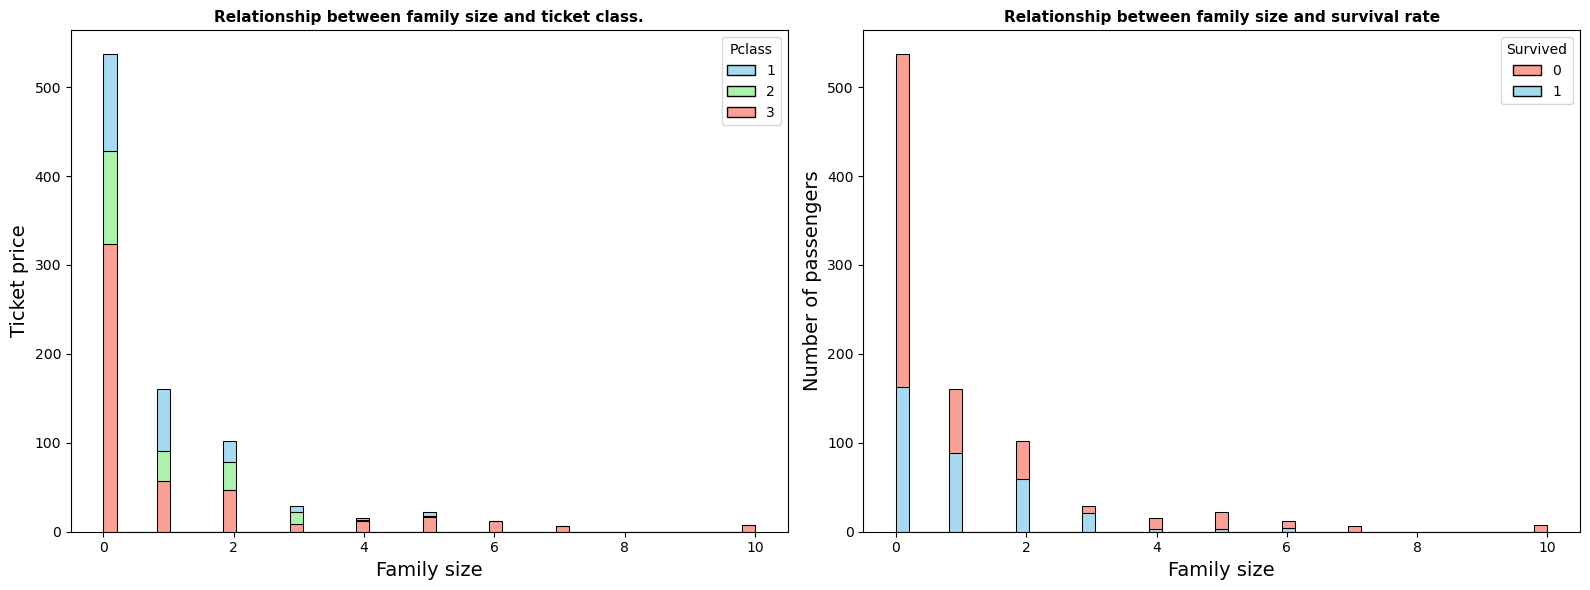

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=titanic_families, x='family_size', hue='Pclass', multiple='stack', ax=axs[0], palette=class_color)                  # We create a stacked histiogram with the family_size data by Pclass.
axs[0].set_xlabel('Family size', fontsize=14)
axs[0].set_ylabel('Ticket price', fontsize=14)
axs[0].set_title('Relationship between family size and ticket class.', fontdict={'fontsize': 11, 'fontweight': 'bold'})

sns.histplot(data=titanic_families, x='family_size', hue='Survived', multiple='stack', ax=axs[1], palette=survival_color)             # we create a stacked histiogram with the family_size data by Survived.
axs[1].set_xlabel('Family size', fontsize=14)
axs[1].set_ylabel('Number of passengers', fontsize=14)
axs[1].set_title('Relationship between family size and survival rate', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

The first stacked histogram presents the relationship between family size, fares and class of ticket purchased. We observe that a large proportion of the passengers traveled without any family member on board, mainly in third class. When considering a family member on board, first and third class passengers are the most numerous. In the 2 family members band, third class passengers are in the majority, followed by second class. Finally, in the 3 family members category, second class passengers predominate. From here onwards, the largest families on board are mostly third class.

The following stacked histogram addresses the data related to the survival rate of families as a function of their number. We observe that travelers traveling alone were the most affected by the disaster, with a survival rate of approximately 30%. However, in the bands of 1 to 3 family members on board, the survival rate increases significantly, exceeding 60%. From here on, we observe very low survival rates, suggesting the importance of the company of relatives as a factor related to survival. This trend may be indicative of the prioritization of family evacuation and the impossibility of managing the rescue of all components of large families.

### **8.** Simple viability model and predictions

In this section, we will develop a regression algorithm that will help us identify patterns and correlations in the data, allowing us to mathematically determine the probability of death as a function of the input parameters.

Using machine learning techniques and statistical analysis, our goal is to build a simple predictive model that will allow us to more accurately predict the factors that influenced survival on the Titanic.

This model will provide us with reliable estimates of survival probabilities for different passenger profiles.

#### Logistic regression model

It is a pleasure to introduce you to our predictive model. Now the good stuff starts! 

I have chosen this option not only because of its ease of testing and speed of results... but also because it is the only one I have mastered so far. - As they say, you have to start somewhere :)

The Logistic Regression we are about to perform will give us a solid basis for predicting whether or not a passenger will survive the sinking of the Titanic. With this first approximation, we will be able to evaluate future approaches with more complex algorithms and develop more advanced models in the future.

In [55]:
titanic                                                                                     # Checking Dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,3
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,3
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,26.8,1,2,W./C. 6607,23.4500,3


The analysis of the DataSet reveals the presence of several series that, as explained at the beginning of the Notebook, lack statistical value and will not be considered in our model. In addition, there are other columns that need to be transformed for their proper functioning.

Starting our work, we will proceed to make the necessary modifications and transformations.

- In order to preserve the integrity of the data, we will create copies of the series that will serve as inputs, excluding all those that are not relevant to our analysis.

- Likewise, we have generated a copy of the series 'Survived', which represents the variable we wish to predict in our model.

In [56]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']].copy(deep=True)                  # Total copy of inputs.
y = titanic[['Survived']].copy(deep=True)                                                   # Total copy of variable to be predicted.  

# I was giving the model a lot of thought as it was chaining failure errors, until I found this solution by consulting.
y = y.values.ravel()                                                                        # It transforms the DF into a one-dimensional array of NumPy.

print(X,'\n','-'*75, '\n', y)                                                               # checking.

             Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                          
1                 3    1  22.0      1      0   7.2500
2                 1    0  38.0      1      0  71.2833
3                 3    0  26.0      0      0   7.9250
4                 1    0  35.0      1      0  53.1000
5                 3    1  35.0      0      0   8.0500
...             ...  ...   ...    ...    ...      ...
887               2    1  27.0      0      0  13.0000
888               1    0  19.0      0      0  30.0000
889               3    0  26.8      1      2  23.4500
890               1    1  26.0      0      0  30.0000
891               3    1  32.0      0      0   7.7500

[891 rows x 6 columns] 
 --------------------------------------------------------------------------- 
 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0

We continue the process by performing data normalization. This step is of utmost importance, as it enables the model to perform its mathematical calculations with greater efficiency and accuracy.

Normalizing the data ensures that all variables share a similar range and prevents any one variable from having a dominant impact on the others during the prediction process.

In [57]:
to_scale = ['Age','SibSp','Parch','Fare']                                    # List to scale.
scaler_dict = {}    

for num_var in to_scale:                                                     # It scrolls through each element of to_scale .
    ss = StandardScaler()                                                    # It creates a StandardScaler object.
    X[num_var] = ss.fit_transform(X[num_var].to_numpy().reshape(-1,1))       # It scales the current numeric variable using the StandardScaler object. fit_transform fits the StandardScaler object to the data and then scales it between the given parameters and assigns it to X.
    scaler_dict[num_var] = ss                                                # It stores the StandardScaler used to scale the variable in the scaler_dict dictionary.

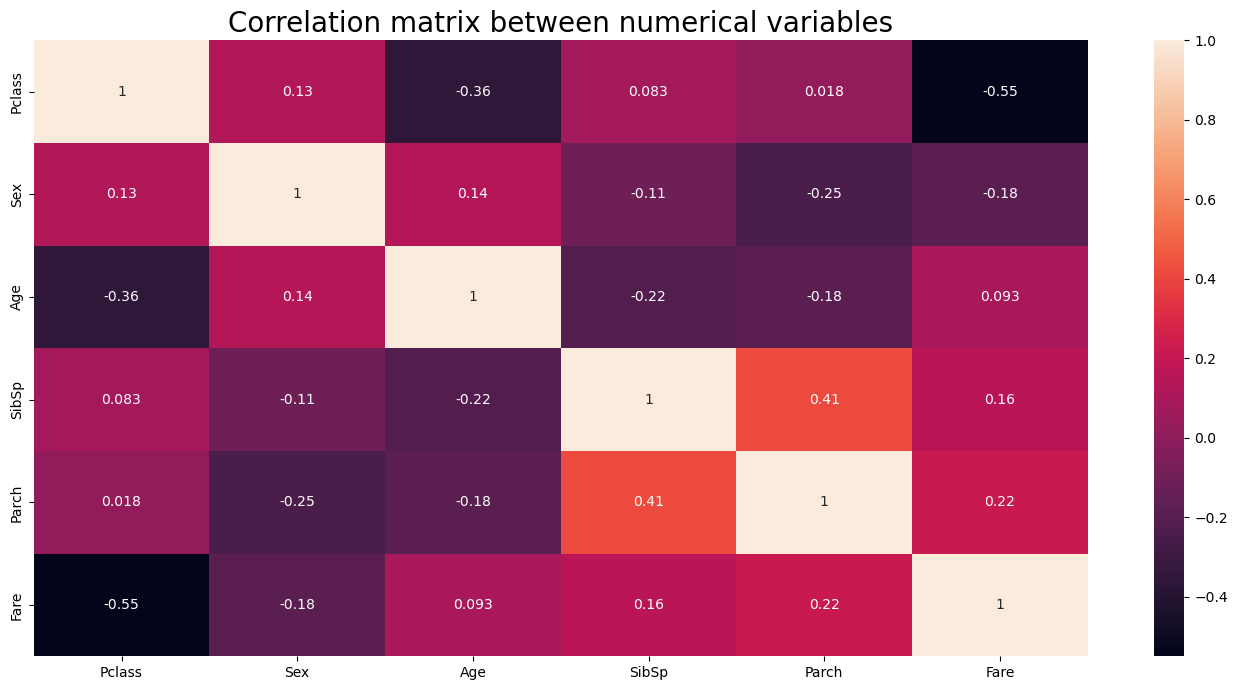

In [58]:
corr = X.corr()                                                              # We call the corr() method and encapsulate it.

fig, ax = plt.subplots(figsize=(17, 8))                                      # we create a figure and an axis and give it dimensions to zoom in.

sns.heatmap(corr, annot=True)                                                # we create a heatmap from seaborn and load the data from the corr var and use annotations.
plt.title('Correlation matrix between numerical variables', fontsize=20)

plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)            # we separate each variable created in two parts (80-20%) by means of the method train_test_split().

X_train.shape, X_test.shape, y_train.shape, y_test.shape                                            # we check the dimensions.

((712, 6), (179, 6), (712,), (179,))

Entrenamos al modelo de regresion logistica

In [60]:
logisticRegr = LogisticRegression()                                                 # we create a LogisticRegression object        

In [61]:
logisticRegr.fit(X_train,y_train)                                                   # with the fit method, we train our model with the selected data.

LogisticRegression()

In [62]:
def accuracy(ground_truth, predictions):                                            # we create a function 'accuary' with two parameters.
    comp = list(ground_truth == predictions)                                        # we create a list containing the result of buying the elements of the arrays, if they are equal it will be True.
    n_true = comp.count(True)                                                       # it accumulates the True.
    n_false = comp.count(False)
    return n_true/(n_true + n_false)                                                # it returns the division of the true by the total.

In [63]:
predictions_train = logisticRegr.predict(X_train)                                   # we use the predict() method to make predictions about the training data set and store them.
ground_truth_train = y_train                                                   

In [64]:
accuracy(ground_truth_train, predictions_train)                                     # accuary method calculates the accuracy of predictions.

0.8075842696629213

Excellent! Obtaining 80% accuracy in training is a very encouraging result, I am very satisfied!

We will now proceed to apply the same process to the test sample, with the objective of evaluating the generalization capability of the model on previously unseen data.

Our purpose is to analyze and verify the performance of the model in a more realistic context and to make sure that its performance can be extrapolated to unknown situations.

In [65]:
predictions_test = logisticRegr.predict(X_test)
ground_truth_test = y_test

In [66]:
accuracy(ground_truth_test, predictions_test)

0.8156424581005587

Awesome! :D

An accuracy of 83% in several of the test sample iterations is an encouraging result. Although I do not know if it would be possible to achieve an even higher score at this early stage, the results speak for themselves. These data demonstrate great potential for developing an even more accurate and fine-tuned predictive model.

Now it is time to delve into the final results and conclusions to close this analysis.

### **9.** Submit the results.

In this dataset we have worked with the experience of almost 900 crew members of the RMS Titanic, of which only 38.4% survived. 

We have focused on analyzing the factors that potentially influenced the high mortality rate that affected the Titanic's crew.

But before presenting our final conclusions, I consider it appropriate to provide a historical context that transcends the data contained, in order to gain a more complete perspective of the wreck. This context is based on research conducted after the sinking.

Although the RMS Titanic was a very advanced and luxurious ship for its time, it is undeniable that safety and risk prevention regulations were completely inadequate. The magnitude of the loss of life during the sinking was due to a combination of human error and poor prevention and emergency response.

- The design of the watertight compartments, conceived to contain water leaks in the event of a hull breach, although innovative for its time in a vessel of its class, proved inadequate due to design problems. The lack of this containment mechanism in the upper deck compartments allowed water to spread from one room to another once a certain level was reached, weighing the ship down until it sank.
- The lack of life-saving and sighting equipment also adversely affected the survival rate. Further investigation revealed that the lookouts on watch on the night of the wreck did not have access to sighting binoculars due to the loss of the key to the locker where they were located. This forced them to have to detect obstacles with their eyesight alone, without any other aid. In addition, the liner lacked an adequate number of lifeboats for its 2,200 crew members. It had only a total of 20 lifeboats and 4 collapsible rafts. This was because the regulations of the time based the number of lifeboats on the ship's weight and not on its passenger capacity.
- Despite repeated warnings from several ships about the presence of icebergs in the area, these were ignored by the captain. In addition, it should be noted that the Titanic was sailing at a higher speed for the sea conditions, which reduced her ability to maneuver to avoid the collision. It is plausible that, had she adopted a more moderate speed, the iceberg could have been detected early enough and avoided in time.

Now then, back to our data set... during the work we have been doing in this Notebook with the various calculations and visualizations, as well as with the prediction model, we have tried to detect the patterns and trends that influenced the survival factor of the Titanic's crew. We are now able to formulate the following hypotheses based on the information collected:

**1. Gender and Survival.**

There is a large gap between the two genders, marked by a large preponderance of male fatalities. Although we know that the number of male passengers was much higher than that of females (more than double the number of females), the survival rate among females is close to 85%, while for males this rate is 32%.

- These data suggest a clear prioritization of women in the salvage policy.

**2. Gender, Class and Survival**

Upon further review of the data, it reveals that there was a clear relationship between the class of ticket purchased, gender and the hope of having survived the sinking. As we have previously stated, there is a clear differentiation between men and women, but within this, we see that this follows a pattern according to the class of ticket purchased.
Women in third class had the highest mortality rate, as opposed to those traveling in first class. This is also evident within the male set.

- These data suggest that first class passengers, either because of their position within the vessel, or because of their access to lifeboats, or because of a policy of preference, had a higher survival rate.

**3. Relatives and Survival**

After observing the relationships between passenger gender and the presence of children or parents, a higher survival rate is shown for women with children. It appears that the accompaniment of relatives, especially with young children, may have positively influenced passenger survival rates.

- This suggests that the so-called "women and children first" policy was applied, prioritizing these groups in the rescue efforts.

**4. Family Size and Survival**

Delving deeper into this subgroup, we can observe a clear preponderance of survival in those passengers who traveled accompanied by one to three family members, the data point to a favorable tendency to travel with family members, especially small groups.

- This reinforces the application of the "women and children first" policy theory, pointing to the possible difficulty of managing the crisis when the number of family members was higher than indicated. It should also be noted that these data may be biased by crewmembers' ticket class, as there are clear indicators that those traveling alone and families with more family members than indicated belonged to third class, pointing to ticket class as a strong indicator.

**5. Ticket Price and Survival**

After analyzing the data, it is evident that ticket price played a crucial role in passenger survival. Those who purchased tickets at higher prices showed significantly higher survival probabilities.

- This may indicate that those passengers who paid more for their tickets received preferential treatment.

**6. Age, Ticket Price and Survival**

If we dig deeper into the data above, we can identify a relationship between age, ticket fare paid and survival rate. Within this relationship, it can be seen that younger passengers and those who paid more of each of the classes, especially first class, had a much higher survival rate.

- As mentioned above, it is possible that either because of their location within the vessel and proximity to the lifeboats, or because of a policy of preference towards passengers in this class, it seems to point to the fact that younger and/or more affluent passengers were prioritized.

In summary, it appears that, despite the complexity of the emergency, decision making and individual priorities during evacuation, the data point to a direct relationship between several factors, such as gender, class of ticket purchased, age and family size, on disaster survival. All of this suggests that survival in the sinking of the RMS Titanic was shaped by social and economic factors. With our predictive model, we have achieved 83% accuracy in several of the iterations. This helps us to determine that it would be viable and feasible to develop a more advanced algorithm, if necessary, to refine the results.

I have learned a lot while working with this dataset. I have made my first exploratory analysis, my first graphs and my first predictive model. I have also realized how important it is to enjoy exploring the data, how crucial it is to take your time and consider the small details and nuances, to manage frustration and that at any time you can learn something new thanks to all the documentation and small gestures and contributions made by other users on the Internet.

Thank you for taking the time to read this work.

We continue working! ;)